In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')

library("readxl")
library(tidyverse)
library(reshape2)

#reading in file
data <- read_excel("CytokineData_102920.xlsx", sheet = 2)
data_df = data.frame(data)

#reading in demographics file
demographics_data_df = data.frame(read_excel("SubjectInfo_102920.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#adding demographics data to cytokine df
#could've made my life easier by just using full_join
race = c()
ethnicity = c()
sex = c()
age = c()
BMI = c()
for (i in 1:length(data_df$SubjectNo)){
    for(j in 1:length(demographics_data_df$SubjectNo)){
        if (data_df$SubjectNo[i] == demographics_data_df$SubjectNo[j]){
            race = c(race, demographics_data_df$Race[j])
            ethnicity = c(ethnicity, demographics_data_df$Ethnicity[j])
            sex = c(sex, demographics_data_df$Sex[j])
            age = c(age, demographics_data_df$Age[j])
            BMI = c(BMI, demographics_data_df$BMI[j])
        }
    }
}

data_df$Race = race
data_df$Ethnicity = ethnicity
data_df$Sex = sex
data_df$Age = age
data_df$BMI = BMI

In [3]:
head(data_df)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E_C_F_002,IFNg,17.642316,4.220509,ELF,1,NS,NS_1,W,NH,F,28,37.67
2,E_C_F_002,IL10,2.873724,1.953721,ELF,1,NS,NS_1,W,NH,F,28,37.67
3,E_C_F_002,IL12p70,1.625272,1.392467,ELF,1,NS,NS_1,W,NH,F,28,37.67
4,E_C_F_002,IL13,36.117692,5.214035,ELF,1,NS,NS_1,W,NH,F,28,37.67
5,E_C_F_002,IL1b,104.409217,6.719857,ELF,1,NS,NS_1,W,NH,F,28,37.67
6,E_C_F_002,IL6,21.159536,4.469856,ELF,1,NS,NS_1,W,NH,F,28,37.67


# Chi Square Analysis/ ANOVA

Comparing demographic variables to see if there are differences across smoking statuses. These nuumbers are from the Table 1 demographics table.

In [4]:
head(demographics_data_df)

,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI,Serum_Cotinine
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,NS,NS_1,W,NH,F,28,37.67,0
2,2,NS,NS_2,O,H,F,33,35.00,0
3,3,NS,NS_3,W,NH,F,25,18.70,0
4,4,NS,NS_4,W,NH,F,26,23.00,0
5,5,NS,NS_5,As,NH,F,25,24.70,0
6,6,NS,NS_6,AA,NH,F,42,34.60,0


In [5]:
get_tables = function(df, variable){
    #getting variable stratified by smoking status
    variable_grouped = df %>% group_by(Group) %>% select(variable) 
    #getting overall variable numbers
    overall_variable = df %>% select(variable) 
    #adding a col that designates this from the overall cohort
    Group = rep('O', times = length(overall_variable)) #O stands for overall
    overall_variable_df = cbind(Group, overall_variable)

    variable_table = table(rbind(overall_variable_df, variable_grouped))
    return(variable_table)
}
sex_table = get_tables(demographics_data_df, 'Sex')
race_table = get_tables(demographics_data_df, 'Race')
ethnicity_table = get_tables(demographics_data_df, 'Ethnicity')

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(variable)` instead of `variable` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Adding missing grouping variables: `Group`

Adding missing grouping variables: `Group`

Adding missing grouping variables: `Group`



In [6]:
sex_table
race_table
ethnicity_table

      Sex
Group   F  M
  CS    8  5
  Ecig  5 12
  NS    7  7
  O    20 24

      Race
Group  AA As  O  W
  CS    6  0  0  7
  Ecig  2  3  1 11
  NS    2  1  1 10
  O    10  4  2 28

      Ethnicity
Group   H NH
  CS    0 13
  Ecig  2 15
  NS    3 11
  O     5 39

In [7]:
#fisher exact test
fisher.test(sex_table)
fisher.test(race_table)
fisher.test(ethnicity_table)


	Fisher's Exact Test for Count Data

data:  sex_table
p-value = 0.3703
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  race_table
p-value = 0.5351
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  ethnicity_table
p-value = 0.4026
alternative hypothesis: two.sided


In [8]:
#dichotimized race
#making race binary between white and non-white subjects
for (i in 1:length(demographics_data_df$Race)){
    if(demographics_data_df$Race[i] != 'W'){
        demographics_data_df$Race[i] = 'NW'
    }
}

#dichotimized race
di_race_table = get_tables(demographics_data_df, 'Race')
fisher.test(di_race_table)

Adding missing grouping variables: `Group`




	Fisher's Exact Test for Count Data

data:  di_race_table
p-value = 0.8293
alternative hypothesis: two.sided


Since none of the p values are significant, the demographics between each smoking status isn't statistically different.

In [9]:
#running anova test for continuous values: age, bmi, cotinine

#putting group into a factor in order to make comparisons
demographics_data_df$Group = factor(demographics_data_df$Group, labels = c(unique(demographics_data_df$Group)))

#normalizing data
mutated_df = demographics_data_df %>%
    mutate(Norm_Age = scale(Age), Norm_BMI = scale(BMI), Norm_Cotinine = scale(Serum_Cotinine))
#contrasts show what compartments are being compared in anova
#these comparisons aren't what we want so I changed them in the function below
contrasts(mutated_df$Group)

,CS,Ecig
NS,0,0
CS,1,0
Ecig,0,1


                    Table of Contrasts
>                   NS    | CS  |  Ecig  |  Sum
>     Contrast 1 |  -2    |  1  |   1    |   0
>     Contrast 2 |  0     | -1  |   1    |   0

> - Contrast 1: compares NS to all other groups
> - Contrast 2: compares CS and Ecig

In [10]:
contrasts(mutated_df$Group) = cbind(c(-2,1,1),c(0,-1,1)) #meaning is specified above
anova_age = aov(Norm_Age~Group, data = mutated_df)
summary(anova_age)
anova_bmi = aov(Norm_BMI~Group, data = mutated_df)
summary(anova_bmi)
anova_continine = aov(Norm_Cotinine~Group, data = mutated_df)
summary(anova_continine)

            Df Sum Sq Mean Sq F value Pr(>F)
Group        2    4.3   2.148   2.276  0.116
Residuals   41   38.7   0.944               

            Df Sum Sq Mean Sq F value Pr(>F)
Group        2   1.24  0.6195   0.608  0.549
Residuals   40  40.76  1.0190               
1 observation deleted due to missingness

            Df Sum Sq Mean Sq F value   Pr(>F)    
Group        2   15.8   7.901   11.91 8.35e-05 ***
Residuals   41   27.2   0.663                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Race

In [11]:
#taking average cytokine concentration by race for smokers only
white = subset(data_df, data_df$Race == 'W' & data_df$Group != 'NS')
black = subset(data_df, data_df$Race == 'AA'& data_df$Group != 'NS')
asian = subset(data_df, data_df$Race == 'As'& data_df$Group != 'NS')
other = subset(data_df, data_df$Race == 'O'& data_df$Group != 'NS')

In [12]:
get_mean_sd = function(subset_df, specific_race){
    #"""
    #:param: takes a subsetted data frame and race
    #:output: a 1x3 matrix containing mean, sd, and subject number

    #"""
    mean = mean(subset_df$Conc_pslog2)
    standard_deviation = sd(subset_df$Conc_pslog2)
    race = specific_race
    mean_sd_df = cbind(mean, standard_deviation, race)
    return(mean_sd_df)
}
white_mean_sd = get_mean_sd(white, 'white')
black_mean_sd = get_mean_sd(black,'black')
asian_mean_sd = get_mean_sd(asian,'asian')
other_mean_sd = get_mean_sd(other,'other')
race_mean_sd_df = data.frame(rbind(white_mean_sd,black_mean_sd,asian_mean_sd,other_mean_sd))
race_mean_sd_df$mean = as.numeric(race_mean_sd_df$mean)
race_mean_sd_df$standard_deviation = as.numeric(race_mean_sd_df$standard_deviation)

In [13]:
race_mean_sd_df

mean,standard_deviation,race
<dbl>,<dbl>,<chr>
4.373529,3.927460,white
4.142466,3.853509,black
4.221295,3.873027,asian
4.269827,3.825950,other


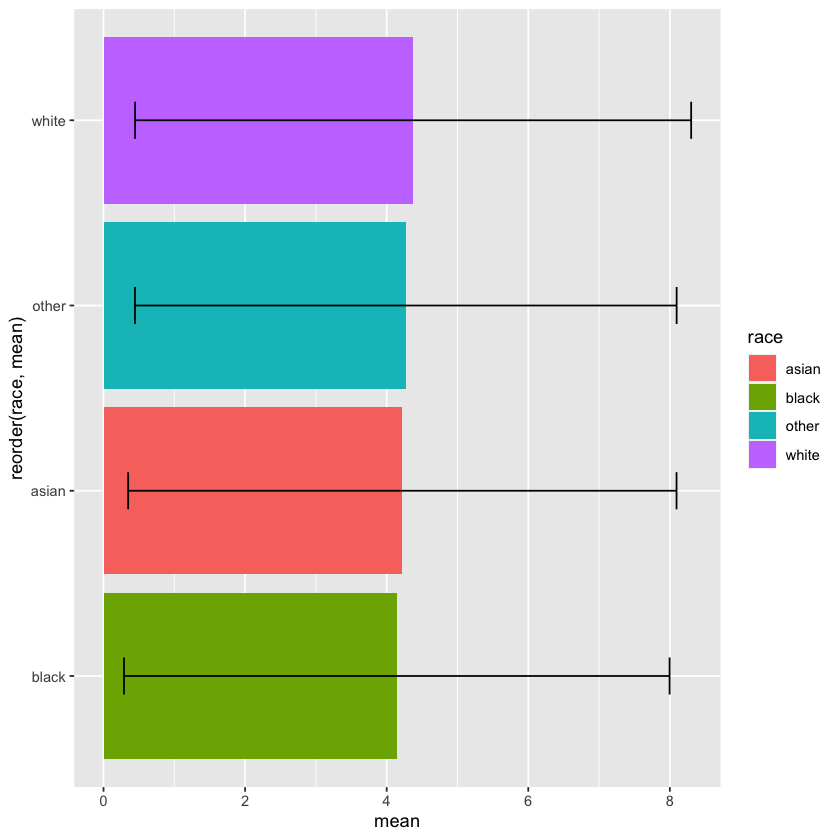

In [14]:
ggplot(race_mean_sd_df) + 
  geom_col(aes(y = reorder(race, mean), x = mean, fill = race)) + 
  geom_errorbar(aes(x = mean, y = race, xmin = mean - standard_deviation, xmax = mean + standard_deviation),
                width = .2, position = position_dodge(.9))

Plotting all cytokines together didn't give much insight, so I'll take averages by cytokine.

In [21]:
get_race_subset = function(dataframe, race, protein, smoking_status){
    #"""
    # Getting concentrations for white subjects for each cytokine based on smoking status (ciagratte or e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$Race == race & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

#white subjects
white_Eotaxin_CS = get_race_subset(data_df, 'W','Eotaxin','CS')
white_Eotaxin3_CS = get_race_subset(data_df, 'W','Eotaxin3','CS')
white_Fractalkine_CS = get_race_subset(data_df, 'W','Fractalkine','CS')
white_I309_CS = get_race_subset(data_df, 'W','I309','CS')
white_IFNg_CS = get_race_subset(data_df, 'W','IFNg','CS')
white_IL10_CS = get_race_subset(data_df, 'W','IL10','CS')
white_IL12p70_CS = get_race_subset(data_df, 'W','IL12p70','CS')
white_IL13_CS = get_race_subset(data_df, 'W','IL13','CS')
white_IL17B_CS = get_race_subset(data_df, 'W','IL17B','CS')
white_IL17D_CS = get_race_subset(data_df, 'W','IL17D','CS')
white_IL1b_CS = get_race_subset(data_df, 'W','IL1b','CS')
white_IL4_CS = get_race_subset(data_df, 'W','IL4','CS')
white_IL6_CS = get_race_subset(data_df, 'W','IL6','CS')
white_IL8_CS = get_race_subset(data_df, 'W','IL8','CS')
white_IP10_CS = get_race_subset(data_df, 'W','IP10','CS')
white_ITAC_CS = get_race_subset(data_df, 'W','ITAC','CS')
white_MCP1_CS = get_race_subset(data_df, 'W','MCP1','CS')
white_MIG_CS = get_race_subset(data_df, 'W','MIG','CS')
white_MIP1a_CS = get_race_subset(data_df, 'W','MIP1a','CS')
white_MIP1b_CS = get_race_subset(data_df, 'W','MIP1b','CS')
white_TARC_CS = get_race_subset(data_df, 'W','TARC','CS')
white_TNFa_CS = get_race_subset(data_df, 'W','TNFa','CS')
white_Eotaxin_Ecig = get_race_subset(data_df, 'W','Eotaxin','Ecig')
white_Eotaxin3_Ecig = get_race_subset(data_df, 'W','Eotaxin3','Ecig')
white_Fractalkine_Ecig = get_race_subset(data_df, 'W','Fractalkine','Ecig')
white_I309_Ecig = get_race_subset(data_df, 'W','I309','Ecig')
white_IFNg_Ecig = get_race_subset(data_df, 'W','IFNg','Ecig')
white_IL10_Ecig = get_race_subset(data_df, 'W','IL10','Ecig')
white_IL12p70_Ecig = get_race_subset(data_df, 'W','IL12p70','Ecig')
white_IL13_Ecig = get_race_subset(data_df, 'W','IL13','Ecig')
white_IL17B_Ecig = get_race_subset(data_df, 'W','IL17B','Ecig')
white_IL17D_Ecig = get_race_subset(data_df, 'W','IL17D','Ecig')
white_IL1b_Ecig = get_race_subset(data_df, 'W','IL1b','Ecig')
white_IL4_Ecig = get_race_subset(data_df, 'W','IL4','Ecig')
white_IL6_Ecig = get_race_subset(data_df, 'W','IL6','Ecig')
white_IL8_Ecig = get_race_subset(data_df, 'W','IL8','Ecig')
white_IP10_Ecig = get_race_subset(data_df, 'W','IP10','Ecig')
white_ITAC_Ecig = get_race_subset(data_df, 'W','ITAC','Ecig')
white_MCP1_Ecig = get_race_subset(data_df, 'W','MCP1','Ecig')
white_MIG_Ecig = get_race_subset(data_df, 'W','MIG','Ecig')
white_MIP1a_Ecig = get_race_subset(data_df, 'W','MIP1a','Ecig')
white_MIP1b_Ecig = get_race_subset(data_df, 'W','MIP1b','Ecig')
white_TARC_Ecig = get_race_subset(data_df, 'W','TARC','Ecig')
white_TNFa_Ecig = get_race_subset(data_df, 'W','TNFa','Ecig')

In [22]:
get_race_subset_nonwhite = function(dataframe, race, protein, smoking_status){
    #"""
    # Getting concentrations for non-Black subjects for each cytokine based on smoking status (ciagratte or e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$Race != race & dataframe$Protein == protein & dataframe$Group == smoking_status)
}
#nonwhite subjects
nonwhite_Eotaxin_CS = get_race_subset_nonwhite(data_df, 'W','Eotaxin','CS')
nonwhite_Eotaxin3_CS = get_race_subset_nonwhite(data_df, 'W','Eotaxin3','CS')
nonwhite_Fractalkine_CS = get_race_subset_nonwhite(data_df, 'W','Fractalkine','CS')
nonwhite_I309_CS = get_race_subset_nonwhite(data_df, 'W','I309','CS')
nonwhite_IFNg_CS = get_race_subset_nonwhite(data_df, 'W','IFNg','CS')
nonwhite_IL10_CS = get_race_subset_nonwhite(data_df, 'W','IL10','CS')
nonwhite_IL12p70_CS = get_race_subset_nonwhite(data_df, 'W','IL12p70','CS')
nonwhite_IL13_CS = get_race_subset_nonwhite(data_df, 'W','IL13','CS')
nonwhite_IL17B_CS = get_race_subset_nonwhite(data_df, 'W','IL17B','CS')
nonwhite_IL17D_CS = get_race_subset_nonwhite(data_df, 'W','IL17D','CS')
nonwhite_IL1b_CS = get_race_subset_nonwhite(data_df, 'W','IL1b','CS')
nonwhite_IL4_CS = get_race_subset_nonwhite(data_df, 'W','IL4','CS')
nonwhite_IL6_CS = get_race_subset_nonwhite(data_df, 'W','IL6','CS')
nonwhite_IL8_CS = get_race_subset_nonwhite(data_df, 'W','IL8','CS')
nonwhite_IP10_CS = get_race_subset_nonwhite(data_df, 'W','IP10','CS')
nonwhite_ITAC_CS = get_race_subset_nonwhite(data_df, 'W','ITAC','CS')
nonwhite_MCP1_CS = get_race_subset_nonwhite(data_df, 'W','MCP1','CS')
nonwhite_MIG_CS = get_race_subset_nonwhite(data_df, 'W','MIG','CS')
nonwhite_MIP1a_CS = get_race_subset_nonwhite(data_df, 'W','MIP1a','CS')
nonwhite_MIP1b_CS = get_race_subset_nonwhite(data_df, 'W','MIP1b','CS')
nonwhite_TARC_CS = get_race_subset_nonwhite(data_df, 'W','TARC','CS')
nonwhite_TNFa_CS = get_race_subset_nonwhite(data_df, 'W','TNFa','CS')
nonwhite_Eotaxin_Ecig = get_race_subset_nonwhite(data_df, 'W','Eotaxin','Ecig')
nonwhite_Eotaxin3_Ecig = get_race_subset_nonwhite(data_df, 'W','Eotaxin3','Ecig')
nonwhite_Fractalkine_Ecig = get_race_subset_nonwhite(data_df, 'W','Fractalkine','Ecig')
nonwhite_I309_Ecig = get_race_subset_nonwhite(data_df, 'W','I309','Ecig')
nonwhite_IFNg_Ecig = get_race_subset_nonwhite(data_df, 'W','IFNg','Ecig')
nonwhite_IL10_Ecig = get_race_subset_nonwhite(data_df, 'W','IL10','Ecig')
nonwhite_IL12p70_Ecig = get_race_subset_nonwhite(data_df, 'W','IL12p70','Ecig')
nonwhite_IL13_Ecig = get_race_subset_nonwhite(data_df, 'W','IL13','Ecig')
nonwhite_IL17B_Ecig = get_race_subset_nonwhite(data_df, 'W','IL17B','Ecig')
nonwhite_IL17D_Ecig = get_race_subset_nonwhite(data_df, 'W','IL17D','Ecig')
nonwhite_IL1b_Ecig = get_race_subset_nonwhite(data_df, 'W','IL1b','Ecig')
nonwhite_IL4_Ecig = get_race_subset_nonwhite(data_df, 'W','IL4','Ecig')
nonwhite_IL6_Ecig = get_race_subset_nonwhite(data_df, 'W','IL6','Ecig')
nonwhite_IL8_Ecig = get_race_subset_nonwhite(data_df, 'W','IL8','Ecig')
nonwhite_IP10_Ecig = get_race_subset_nonwhite(data_df, 'W','IP10','Ecig')
nonwhite_ITAC_Ecig = get_race_subset_nonwhite(data_df, 'W','ITAC','Ecig')
nonwhite_MCP1_Ecig = get_race_subset_nonwhite(data_df, 'W','MCP1','Ecig')
nonwhite_MIG_Ecig = get_race_subset_nonwhite(data_df, 'W','MIG','Ecig')
nonwhite_MIP1a_Ecig = get_race_subset_nonwhite(data_df, 'W','MIP1a','Ecig')
nonwhite_MIP1b_Ecig = get_race_subset_nonwhite(data_df, 'W','MIP1b','Ecig')
nonwhite_TARC_Ecig = get_race_subset_nonwhite(data_df, 'W','TARC','Ecig')
nonwhite_TNFa_Ecig = get_race_subset_nonwhite(data_df, 'W','TNFa','Ecig')

In [23]:
get_race_mean_sd = function(df_subset, race, protein, smoking_status){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (mean and sd)

    #"""
    mean = mean(df_subset$Conc_pslog2)
    standard_deviation = sd(df_subset$Conc_pslog2)
    mean_sd_matrix = cbind(mean, standard_deviation, race, protein, smoking_status) 
    return(mean_sd_matrix)
}
#nonwhite subjects (including asian (4 subjects) and other (2 subjects) here)
nonwhite_smokers_mean_sd_df = data.frame(rbind(get_race_mean_sd(nonwhite_Eotaxin_CS, 'NW','Eotaxin','CS'),get_race_mean_sd(nonwhite_Eotaxin3_CS, 'NW','Eotaxin3','CS'),
                                 get_race_mean_sd(nonwhite_Fractalkine_CS, 'NW','Fractalkine','CS'),get_race_mean_sd(nonwhite_I309_CS, 'NW','I309','CS'), 
                                 get_race_mean_sd(nonwhite_IFNg_CS, 'NW','IFNg','CS'),get_race_mean_sd(nonwhite_IL10_CS, 'NW','IL10','CS'),
                                 get_race_mean_sd(nonwhite_IL12p70_CS, 'NW','IL12p70','CS'),get_race_mean_sd(nonwhite_IL13_CS, 'NW','IL13','CS'),
                                 get_race_mean_sd(nonwhite_IL17B_CS, 'NW','IL17B','CS'),get_race_mean_sd(nonwhite_IL17D_CS, 'NW','IL17D','CS'), 
                                 get_race_mean_sd(nonwhite_IL1b_CS, 'NW','IL1b','CS'),get_race_mean_sd(nonwhite_IL4_CS, 'NW','IL4','CS'),
                                 get_race_mean_sd(nonwhite_IL6_CS, 'NW','IL6','CS'),get_race_mean_sd(nonwhite_IL8_CS, 'NW','IL8','CS'),
                                 get_race_mean_sd(nonwhite_IP10_CS, 'NW','IP10','CS'),get_race_mean_sd(nonwhite_ITAC_CS, 'NW','ITAC','CS'),
                                 get_race_mean_sd(nonwhite_MCP1_CS, 'NW','MCP1','CS'),get_race_mean_sd(nonwhite_MIG_CS, 'NW','MIG','CS'),
                                 get_race_mean_sd(nonwhite_MIP1a_CS, 'NW','MIP1a','CS'),get_race_mean_sd(nonwhite_MIP1b_CS, 'NW','MIP1b','CS'),
                                 get_race_mean_sd(nonwhite_TARC_CS, 'NW','TARC','CS'),get_race_mean_sd(nonwhite_TNFa_CS, 'NW','TNFa','CS'),
                                 get_race_mean_sd(nonwhite_Eotaxin_Ecig, 'NW','Eotaxin','Ecig'),get_race_mean_sd(nonwhite_Eotaxin3_Ecig, 'NW','Eotaxin3','Ecig'),
                                 get_race_mean_sd(nonwhite_Fractalkine_Ecig, 'NW','Fractalkine','Ecig'),get_race_mean_sd(nonwhite_I309_Ecig, 'NW','I309','Ecig'),
                                 get_race_mean_sd(nonwhite_IFNg_Ecig, 'NW','IFNg','Ecig'),get_race_mean_sd(nonwhite_IL10_Ecig, 'NW','IL10','Ecig'),
                                 get_race_mean_sd(nonwhite_IL12p70_Ecig, 'NW','IL12p70','Ecig'),get_race_mean_sd(nonwhite_IL13_Ecig, 'NW','IL13','Ecig'),
                                 get_race_mean_sd(nonwhite_IL17B_Ecig, 'NW','IL17B','Ecig'),get_race_mean_sd(nonwhite_IL17D_Ecig, 'NW','IL17D','Ecig'),
                                 get_race_mean_sd(nonwhite_IL1b_Ecig, 'NW','IL1b','Ecig'),get_race_mean_sd(nonwhite_IL4_Ecig, 'NW','IL4','Ecig'),
                                 get_race_mean_sd(nonwhite_IL6_Ecig, 'NW','IL6','Ecig'),get_race_mean_sd(nonwhite_IL8_Ecig, 'NW','IL8','Ecig'),
                                 get_race_mean_sd(nonwhite_IP10_Ecig, 'NW','IP10','Ecig'),get_race_mean_sd(nonwhite_ITAC_Ecig, 'NW','ITAC','Ecig'),
                                 get_race_mean_sd(nonwhite_MCP1_Ecig, 'NW','MCP1','Ecig'),get_race_mean_sd(nonwhite_MIG_Ecig, 'NW','MIG','Ecig'),
                                 get_race_mean_sd(nonwhite_MIP1a_Ecig, 'NW','MIP1a','Ecig'),get_race_mean_sd(nonwhite_MIP1b_Ecig, 'NW','MIP1b','Ecig'),
                                 get_race_mean_sd(nonwhite_TARC_Ecig, 'NW','TARC','Ecig'),get_race_mean_sd(nonwhite_TNFa_Ecig, 'NW','TNFa','Ecig')))

#white subjects
white_smokers_mean_sd_df = data.frame(rbind(get_race_mean_sd(white_Eotaxin_CS, 'W','Eotaxin','CS'),get_race_mean_sd(white_Eotaxin3_CS, 'W','Eotaxin3','CS'),
                                 get_race_mean_sd(white_Fractalkine_CS, 'W','Fractalkine','CS'),get_race_mean_sd(white_I309_CS, 'W','I309','CS'), 
                                 get_race_mean_sd(white_IFNg_CS, 'W','IFNg','CS'),get_race_mean_sd(white_IL10_CS, 'W','IL10','CS'),
                                 get_race_mean_sd(white_IL12p70_CS, 'W','IL12p70','CS'),get_race_mean_sd(white_IL13_CS, 'W','IL13','CS'),
                                 get_race_mean_sd(white_IL17B_CS, 'W','IL17B','CS'),get_race_mean_sd(white_IL17D_CS, 'W','IL17D','CS'), 
                                 get_race_mean_sd(white_IL1b_CS, 'W','IL1b','CS'),get_race_mean_sd(white_IL4_CS, 'W','IL4','CS'),
                                 get_race_mean_sd(white_IL6_CS, 'W','IL6','CS'),get_race_mean_sd(white_IL8_CS, 'W','IL8','CS'),
                                 get_race_mean_sd(white_IP10_CS, 'W','IP10','CS'),get_race_mean_sd(white_ITAC_CS, 'W','ITAC','CS'),
                                 get_race_mean_sd(white_MCP1_CS, 'W','MCP1','CS'),get_race_mean_sd(white_MIG_CS, 'W','MIG','CS'),
                                 get_race_mean_sd(white_MIP1a_CS, 'W','MIP1a','CS'),get_race_mean_sd(white_MIP1b_CS, 'W','MIP1b','CS'),
                                 get_race_mean_sd(white_TARC_CS, 'W','TARC','CS'),get_race_mean_sd(white_TNFa_CS, 'W','TNFa','CS'),
                                 get_race_mean_sd(white_Eotaxin_Ecig, 'W','Eotaxin','Ecig'),get_race_mean_sd(white_Eotaxin3_Ecig, 'W','Eotaxin3','Ecig'),
                                 get_race_mean_sd(white_Fractalkine_Ecig, 'W','Fractalkine','Ecig'),get_race_mean_sd(white_I309_Ecig, 'W','I309','Ecig'),
                                 get_race_mean_sd(white_IFNg_Ecig, 'W','IFNg','Ecig'),get_race_mean_sd(white_IL10_Ecig, 'W','IL10','Ecig'),
                                 get_race_mean_sd(white_IL12p70_Ecig, 'W','IL12p70','Ecig'),get_race_mean_sd(white_IL13_Ecig, 'W','IL13','Ecig'),
                                 get_race_mean_sd(white_IL17B_Ecig, 'W','IL17B','Ecig'),get_race_mean_sd(white_IL17D_Ecig, 'W','IL17D','Ecig'),
                                 get_race_mean_sd(white_IL1b_Ecig, 'W','IL1b','Ecig'),get_race_mean_sd(white_IL4_Ecig, 'W','IL4','Ecig'),
                                 get_race_mean_sd(white_IL6_Ecig, 'W','IL6','Ecig'),get_race_mean_sd(white_IL8_Ecig, 'W','IL8','Ecig'),
                                 get_race_mean_sd(white_IP10_Ecig, 'W','IP10','Ecig'),get_race_mean_sd(white_ITAC_Ecig, 'W','ITAC','Ecig'),
                                 get_race_mean_sd(white_MCP1_Ecig, 'W','MCP1','Ecig'),get_race_mean_sd(white_MIG_Ecig, 'W','MIG','Ecig'),
                                 get_race_mean_sd(white_MIP1a_Ecig, 'W','MIP1a','Ecig'),get_race_mean_sd(white_MIP1b_Ecig, 'W','MIP1b','Ecig'),
                                 get_race_mean_sd(white_TARC_Ecig, 'W','TARC','Ecig'),get_race_mean_sd(white_TNFa_Ecig, 'W','TNFa','Ecig')))

white_smokers_mean_sd_df$mean = as.numeric(white_smokers_mean_sd_df$mean)
nonwhite_smokers_mean_sd_df$mean = as.numeric(nonwhite_smokers_mean_sd_df$mean)
white_smokers_mean_sd_df$standard_deviation = as.numeric(white_smokers_mean_sd_df$standard_deviation)
nonwhite_smokers_mean_sd_df$standard_deviation = as.numeric(nonwhite_smokers_mean_sd_df$standard_deviation)

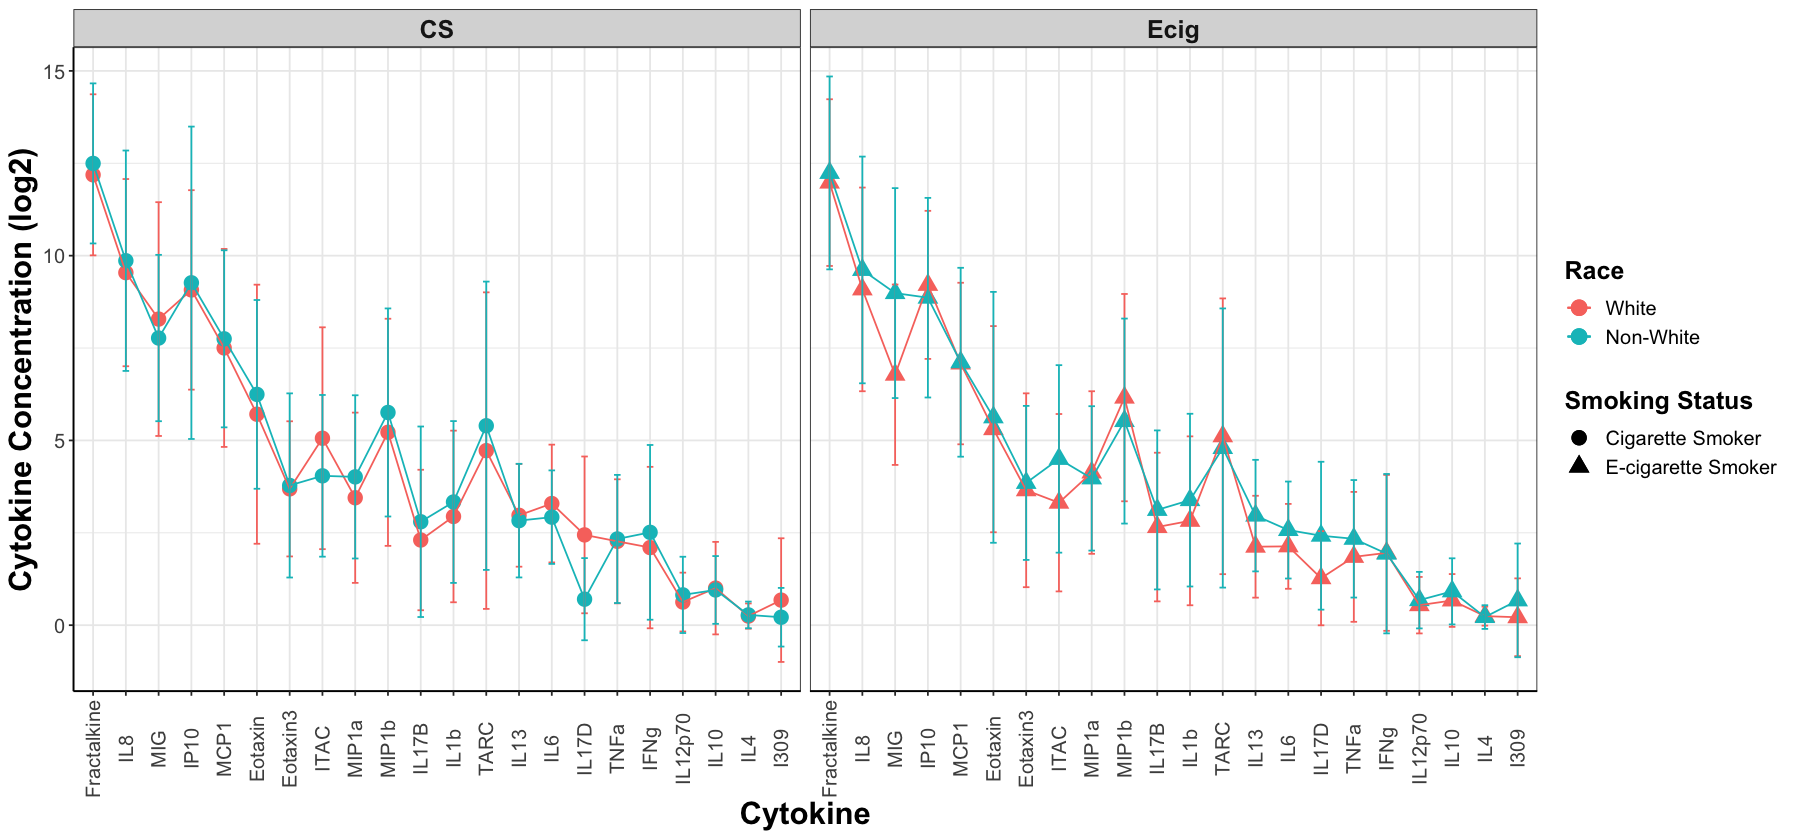

In [29]:
options(repr.plot.width=15, repr.plot.height=7) 
descending_cytokines = c('Fractalkine','IL8','MIG','IP10','MCP1','Eotaxin','Eotaxin3','ITAC','MIP1a','MIP1b','IL17B',
                         'IL1b','TARC','IL13','IL6','IL17D','TNFa','IFNg','IL12p70','IL10','IL4','I309')
cytokines = factor(nonwhite_smokers_mean_sd_df$protein, levels = descending_cytokines)
ggplot() + 
  geom_point(data = nonwhite_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, 
                                                     color = race), size = 4) + 
  geom_point(data = white_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, 
                                                  color = race), size = 4) +
  geom_line(data = nonwhite_smokers_mean_sd_df, aes(x = cytokines, y = mean, color = race,
                                                    group = smoking_status)) + 
  geom_line(data = white_smokers_mean_sd_df, aes(x = cytokines, y = mean, color = race,
                                                    group = smoking_status)) +
  geom_errorbar(data = nonwhite_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = race), width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = white_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = race), width = .2, position = position_dodge(.9)) +
  facet_wrap(~smoking_status) + 
  theme_bw() + 

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  labs(color = "Race", shape = 'Smoking Status') +#legend name
  scale_colour_discrete(name  ="Race",
                            labels=c("White", "Non-White")) +
  scale_shape_discrete(name  ="Smoking Status",
                           #breaks=c("Female", "Male"),
                           labels=c("Cigarette Smoker", "E-cigarette Smoker"))

Running Wilcoxon Rank Sum tests.

In [25]:
#white vs. non-white CS
Eotaxin_race_CS = wilcox.test(white_Eotaxin_CS$Conc_pslog2, nonwhite_Eotaxin_CS$Conc_pslog2)
Eotaxin3_race_CS = wilcox.test(white_Eotaxin3_CS$Conc_pslog2, nonwhite_Eotaxin3_CS$Conc_pslog2)
Fractalkine_race_CS = wilcox.test(white_Fractalkine_CS$Conc_pslog2, nonwhite_Fractalkine_CS$Conc_pslog2)
I309_race_CS = wilcox.test(white_I309_CS$Conc_pslog2, nonwhite_I309_CS$Conc_pslog2)
IFNg_race_CS = wilcox.test(white_IFNg_CS$Conc_pslog2, nonwhite_IFNg_CS$Conc_pslog2)
IL10_race_CS = wilcox.test(white_IL10_CS$Conc_pslog2, nonwhite_IL10_CS$Conc_pslog2)
IL12p70_race_CS = wilcox.test(white_IL12p70_CS$Conc_pslog2, nonwhite_IL12p70_CS$Conc_pslog2)
IL13_race_CS = wilcox.test(white_IL13_CS$Conc_pslog2, nonwhite_IL13_CS$Conc_pslog2)
IL17B_race_CS = wilcox.test(white_IL17B_CS$Conc_pslog2, nonwhite_IL17B_CS$Conc_pslog2)
IL17D_race_CS = wilcox.test(white_IL17D_CS$Conc_pslog2, nonwhite_IL17D_CS$Conc_pslog2)
IL1b_race_CS = wilcox.test(white_IL1b_CS$Conc_pslog2, nonwhite_IL1b_CS$Conc_pslog2)
IL4_race_CS = wilcox.test(white_IL4_CS$Conc_pslog2, nonwhite_IL4_CS$Conc_pslog2)
IL6_race_CS = wilcox.test(white_IL6_CS$Conc_pslog2, nonwhite_IL6_CS$Conc_pslog2)
IL8_race_CS = wilcox.test(white_IL8_CS$Conc_pslog2, nonwhite_IL8_CS$Conc_pslog2)
IP10_race_CS = wilcox.test(white_IP10_CS$Conc_pslog2, nonwhite_IP10_CS$Conc_pslog2)
ITAC_race_CS = wilcox.test(white_ITAC_CS$Conc_pslog2, nonwhite_ITAC_CS$Conc_pslog2)
MCP1_race_CS = wilcox.test(white_MCP1_CS$Conc_pslog2, nonwhite_MCP1_CS$Conc_pslog2)
MIG_race_CS = wilcox.test(white_MIG_CS$Conc_pslog2, nonwhite_MIG_CS$Conc_pslog2)
MIP1a_race_CS = wilcox.test(white_MIP1a_CS$Conc_pslog2, nonwhite_MIP1a_CS$Conc_pslog2)
MIP1b_race_CS = wilcox.test(white_MIP1b_CS$Conc_pslog2, nonwhite_MIP1b_CS$Conc_pslog2)
TARC_race_CS = wilcox.test(white_TARC_CS$Conc_pslog2, nonwhite_TARC_CS$Conc_pslog2)
TNFa_race_CS = wilcox.test(white_TNFa_CS$Conc_pslog2, nonwhite_TNFa_CS$Conc_pslog2)

#white vs. non-white Ecig
Eotaxin_race_Ecig = wilcox.test(white_Eotaxin_Ecig$Conc_pslog2, nonwhite_Eotaxin_Ecig$Conc_pslog2)
Eotaxin3_race_Ecig = wilcox.test(white_Eotaxin3_Ecig$Conc_pslog2, nonwhite_Eotaxin3_Ecig$Conc_pslog2)
Fractalkine_race_Ecig = wilcox.test(white_Fractalkine_Ecig$Conc_pslog2, nonwhite_Fractalkine_Ecig$Conc_pslog2)
I309_race_Ecig = wilcox.test(white_I309_Ecig$Conc_pslog2, nonwhite_I309_Ecig$Conc_pslog2)
IFNg_race_Ecig = wilcox.test(white_IFNg_Ecig$Conc_pslog2, nonwhite_IFNg_Ecig$Conc_pslog2)
IL10_race_Ecig = wilcox.test(white_IL10_Ecig$Conc_pslog2, nonwhite_IL10_Ecig$Conc_pslog2)
IL12p70_race_Ecig = wilcox.test(white_IL12p70_Ecig$Conc_pslog2, nonwhite_IL12p70_Ecig$Conc_pslog2)
IL13_race_Ecig = wilcox.test(white_IL13_Ecig$Conc_pslog2, nonwhite_IL13_Ecig$Conc_pslog2)
IL17B_race_Ecig = wilcox.test(white_IL17B_Ecig$Conc_pslog2, nonwhite_IL17B_Ecig$Conc_pslog2)
IL17D_race_Ecig = wilcox.test(white_IL17D_Ecig$Conc_pslog2, nonwhite_IL17D_Ecig$Conc_pslog2)
IL1b_race_Ecig = wilcox.test(white_IL1b_Ecig$Conc_pslog2, nonwhite_IL1b_Ecig$Conc_pslog2)
IL4_race_Ecig = wilcox.test(white_IL4_Ecig$Conc_pslog2, nonwhite_IL4_Ecig$Conc_pslog2)
IL6_race_Ecig = wilcox.test(white_IL6_Ecig$Conc_pslog2, nonwhite_IL6_Ecig$Conc_pslog2)
IL8_race_Ecig = wilcox.test(white_IL8_Ecig$Conc_pslog2, nonwhite_IL8_Ecig$Conc_pslog2)
IP10_race_Ecig = wilcox.test(white_IP10_Ecig$Conc_pslog2, nonwhite_IP10_Ecig$Conc_pslog2)
ITAC_race_Ecig = wilcox.test(white_ITAC_Ecig$Conc_pslog2, nonwhite_ITAC_Ecig$Conc_pslog2)
MCP1_race_Ecig = wilcox.test(white_MCP1_Ecig$Conc_pslog2, nonwhite_MCP1_Ecig$Conc_pslog2)
MIG_race_Ecig = wilcox.test(white_MIG_Ecig$Conc_pslog2, nonwhite_MIG_Ecig$Conc_pslog2)
MIP1a_race_Ecig = wilcox.test(white_MIP1a_Ecig$Conc_pslog2, nonwhite_MIP1a_Ecig$Conc_pslog2)
MIP1b_race_Ecig = wilcox.test(white_MIP1b_Ecig$Conc_pslog2, nonwhite_MIP1b_Ecig$Conc_pslog2)
TARC_race_Ecig = wilcox.test(white_TARC_Ecig$Conc_pslog2, nonwhite_TARC_Ecig$Conc_pslog2)
TNFa_race_Ecig = wilcox.test(white_TNFa_Ecig$Conc_pslog2, nonwhite_TNFa_Ecig$Conc_pslog2)

Warning message in wilcox.test.default(white_Eotaxin_CS$Conc_pslog2, nonwhite_Eotaxin_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(white_Eotaxin3_CS$Conc_pslog2, nonwhite_Eotaxin3_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(white_I309_CS$Conc_pslog2, nonwhite_I309_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(white_IFNg_CS$Conc_pslog2, nonwhite_IFNg_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(white_IL10_CS$Conc_pslog2, nonwhite_IL10_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(white_IL12p70_CS$Conc_pslog2, nonwhite_IL12p70_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(white_IL13_CS$Conc_pslog2, nonwhite_IL13_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning messag

In [26]:
get_stat_pvalue_tuple = function(wilcox_test){
    rank_sum = wilcox_test$statistic
    p_value = wilcox_test$p.value
    tuple = c(rank_sum, p_value)
    return(tuple)
}
#white vs. non-white CS
Eotaxin_CS_tuple = get_stat_pvalue_tuple(Eotaxin_race_CS)
Eotaxin3_CS_tuple = get_stat_pvalue_tuple(Eotaxin3_race_CS)
Fractalkine_CS_tuple = get_stat_pvalue_tuple(Fractalkine_race_CS)
I309_CS_tuple = get_stat_pvalue_tuple(I309_race_CS)
IFNg_CS_tuple = get_stat_pvalue_tuple(IFNg_race_CS)
IL10_CS_tuple = get_stat_pvalue_tuple(IL10_race_CS)
IL12p70_CS_tuple = get_stat_pvalue_tuple(IL12p70_race_CS)
IL13_CS_tuple = get_stat_pvalue_tuple(IL13_race_CS)
IL17B_CS_tuple = get_stat_pvalue_tuple(IL17B_race_CS)
IL17D_CS_tuple = get_stat_pvalue_tuple(IL17D_race_CS)
IL1b_CS_tuple = get_stat_pvalue_tuple(IL1b_race_CS)
IL4_CS_tuple = get_stat_pvalue_tuple(IL4_race_CS)
IL6_CS_tuple = get_stat_pvalue_tuple(IL6_race_CS)
IL8_CS_tuple = get_stat_pvalue_tuple(IL8_race_CS)
IP10_CS_tuple = get_stat_pvalue_tuple(IP10_race_CS)
ITAC_CS_tuple = get_stat_pvalue_tuple(ITAC_race_CS)
MCP1_CS_tuple = get_stat_pvalue_tuple(MCP1_race_CS)
MIG_CS_tuple = get_stat_pvalue_tuple(MIG_race_CS)
MIP1a_CS_tuple = get_stat_pvalue_tuple(MIP1a_race_CS)
MIP1b_CS_tuple = get_stat_pvalue_tuple(MIP1b_race_CS)
TARC_CS_tuple = get_stat_pvalue_tuple(TARC_race_CS)
TNFa_CS_tuple = get_stat_pvalue_tuple(TNFa_race_CS)

#white vs. non-white Ecig
Eotaxin_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin_race_Ecig)
Eotaxin3_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin3_race_Ecig)
Fractalkine_Ecig_tuple = get_stat_pvalue_tuple(Fractalkine_race_Ecig)
I309_Ecig_tuple = get_stat_pvalue_tuple(I309_race_Ecig)
IFNg_Ecig_tuple = get_stat_pvalue_tuple(IFNg_race_Ecig)
IL10_Ecig_tuple = get_stat_pvalue_tuple(IL10_race_Ecig)
IL12p70_Ecig_tuple = get_stat_pvalue_tuple(IL12p70_race_Ecig)
IL13_Ecig_tuple = get_stat_pvalue_tuple(IL13_race_Ecig)
IL17B_Ecig_tuple = get_stat_pvalue_tuple(IL17B_race_Ecig)
IL17D_Ecig_tuple = get_stat_pvalue_tuple(IL17D_race_Ecig)
IL1b_Ecig_tuple = get_stat_pvalue_tuple(IL1b_race_Ecig)
IL4_Ecig_tuple = get_stat_pvalue_tuple(IL4_race_Ecig)
IL6_Ecig_tuple = get_stat_pvalue_tuple(IL6_race_Ecig)
IL8_Ecig_tuple = get_stat_pvalue_tuple(IL8_race_Ecig)
IP10_Ecig_tuple = get_stat_pvalue_tuple(IP10_race_Ecig)
ITAC_Ecig_tuple = get_stat_pvalue_tuple(ITAC_race_Ecig)
MCP1_Ecig_tuple = get_stat_pvalue_tuple(MCP1_race_Ecig)
MIG_Ecig_tuple = get_stat_pvalue_tuple(MIG_race_Ecig)
MIP1a_Ecig_tuple = get_stat_pvalue_tuple(MIP1a_race_Ecig)
MIP1b_Ecig_tuple = get_stat_pvalue_tuple(MIP1b_race_Ecig)
TARC_Ecig_tuple = get_stat_pvalue_tuple(TARC_race_Ecig)
TNFa_Ecig_tuple = get_stat_pvalue_tuple(TNFa_race_Ecig)

In [27]:
table_summary = function(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa){
    #"""
    #Putting stats into a table(matrix) to make transfer to excel easier.

    #:param: none
    #:output: a 22x2 matrix containing statistic and p value. 
    #"""
    compartment_stats_table = rbind(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa)
    
    colnames(compartment_stats_table) = c('Statistic','p value')
    return(compartment_stats_table)
}

In [28]:
race_CS_table = table_summary(Eotaxin_CS_tuple, Eotaxin3_CS_tuple, Fractalkine_CS_tuple,I309_CS_tuple,
                            IFNg_CS_tuple, IL10_CS_tuple, IL12p70_CS_tuple, IL13_CS_tuple, 
                            IL17B_CS_tuple, IL17D_CS_tuple, IL1b_CS_tuple, IL4_CS_tuple, IL6_CS_tuple,
                            IL8_CS_tuple, IP10_CS_tuple, ITAC_CS_tuple, MCP1_CS_tuple, MIG_CS_tuple,
                            MIP1a_CS_tuple, MIP1b_CS_tuple, TARC_CS_tuple, TNFa_CS_tuple)
race_Ecig_table = table_summary(Eotaxin_Ecig_tuple, Eotaxin3_Ecig_tuple, Fractalkine_Ecig_tuple,I309_Ecig_tuple,
                            IFNg_Ecig_tuple, IL10_Ecig_tuple, IL12p70_Ecig_tuple, IL13_Ecig_tuple, 
                            IL17B_Ecig_tuple, IL17D_Ecig_tuple, IL1b_Ecig_tuple, IL4_Ecig_tuple, IL6_Ecig_tuple,
                            IL8_Ecig_tuple, IP10_Ecig_tuple, ITAC_Ecig_tuple, MCP1_Ecig_tuple, MIG_Ecig_tuple,
                            MIP1a_Ecig_tuple, MIP1b_Ecig_tuple, TARC_Ecig_tuple, TNFa_Ecig_tuple)
race_table = cbind(race_CS_table, race_Ecig_table) 
race_table

,Statistic,p value,Statistic,p value
Eotaxin,358.0,0.6929805401,557.5,0.7096213463
Eotaxin3,346.0,0.8615098803,585.0,0.4682577674
Fractalkine,360.0,0.6688056237,594.0,0.4033139895
I309,302.0,0.2677247316,610.5,0.0876085528
IFNg,382.0,0.4013973106,469.0,0.4460461478
IL10,365.5,0.5944943618,619.0,0.2474593740
IL12p70,347.0,0.8456769525,624.0,0.2152999849
IL13,325.5,0.8543312134,707.0,0.0219074427
IL17B,385.5,0.3582927788,588.5,0.4377105968
IL17D,140.5,0.0002564364,715.5,0.0161104554


# Ethnicity

In [20]:
get_ethnicity_subset = function(dataframe, ethnicity, protein, smoking_status){
    #"""
    # Getting concentrations for subjects based on ethnicity for each cytokine based on smoking status (ciagratte or 
    # e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$Ethnicity == ethnicity & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

#hispanic subjects
hispanic_Eotaxin_CS = get_ethnicity_subset(data_df, 'H','Eotaxin','CS')
hispanic_Eotaxin3_CS = get_ethnicity_subset(data_df, 'H','Eotaxin3','CS')
hispanic_Fractalkine_CS = get_ethnicity_subset(data_df, 'H','Fractalkine','CS')
hispanic_I309_CS = get_ethnicity_subset(data_df, 'H','I309','CS')
hispanic_IFNg_CS = get_ethnicity_subset(data_df, 'H','IFNg','CS')
hispanic_IL10_CS = get_ethnicity_subset(data_df, 'H','IL10','CS')
hispanic_IL12p70_CS = get_ethnicity_subset(data_df, 'H','IL12p70','CS')
hispanic_IL13_CS = get_ethnicity_subset(data_df, 'H','IL13','CS')
hispanic_IL17B_CS = get_ethnicity_subset(data_df, 'H','IL17B','CS')
hispanic_IL17D_CS = get_ethnicity_subset(data_df, 'H','IL17D','CS')
hispanic_IL1b_CS = get_ethnicity_subset(data_df, 'H','IL1b','CS')
hispanic_IL4_CS = get_ethnicity_subset(data_df, 'H','IL4','CS')
hispanic_IL6_CS = get_ethnicity_subset(data_df, 'H','IL6','CS')
hispanic_IL8_CS = get_ethnicity_subset(data_df, 'H','IL8','CS')
hispanic_IP10_CS = get_ethnicity_subset(data_df, 'H','IP10','CS')
hispanic_ITAC_CS = get_ethnicity_subset(data_df, 'H','ITAC','CS')
hispanic_MCP1_CS = get_ethnicity_subset(data_df, 'H','MCP1','CS')
hispanic_MIG_CS = get_ethnicity_subset(data_df, 'H','MIG','CS')
hispanic_MIP1a_CS = get_ethnicity_subset(data_df, 'H','MIP1a','CS')
hispanic_MIP1b_CS = get_ethnicity_subset(data_df, 'H','MIP1b','CS')
hispanic_TARC_CS = get_ethnicity_subset(data_df, 'H','TARC','CS')
hispanic_TNFa_CS = get_ethnicity_subset(data_df, 'H','TNFa','CS')
hispanic_Eotaxin_Ecig = get_ethnicity_subset(data_df, 'H','Eotaxin','Ecig')
hispanic_Eotaxin3_Ecig = get_ethnicity_subset(data_df, 'H','Eotaxin3','Ecig')
hispanic_Fractalkine_Ecig = get_ethnicity_subset(data_df, 'H','Fractalkine','Ecig')
hispanic_I309_Ecig = get_ethnicity_subset(data_df, 'H','I309','Ecig')
hispanic_IFNg_Ecig = get_ethnicity_subset(data_df, 'H','IFNg','Ecig')
hispanic_IL10_Ecig = get_ethnicity_subset(data_df, 'H','IL10','Ecig')
hispanic_IL12p70_Ecig = get_ethnicity_subset(data_df, 'H','IL12p70','Ecig')
hispanic_IL13_Ecig = get_ethnicity_subset(data_df, 'H','IL13','Ecig')
hispanic_IL17B_Ecig = get_ethnicity_subset(data_df, 'H','IL17B','Ecig')
hispanic_IL17D_Ecig = get_ethnicity_subset(data_df, 'H','IL17D','Ecig')
hispanic_IL1b_Ecig = get_ethnicity_subset(data_df, 'H','IL1b','Ecig')
hispanic_IL4_Ecig = get_ethnicity_subset(data_df, 'H','IL4','Ecig')
hispanic_IL6_Ecig = get_ethnicity_subset(data_df, 'H','IL6','Ecig')
hispanic_IL8_Ecig = get_ethnicity_subset(data_df, 'H','IL8','Ecig')
hispanic_IP10_Ecig = get_ethnicity_subset(data_df, 'H','IP10','Ecig')
hispanic_ITAC_Ecig = get_ethnicity_subset(data_df, 'H','ITAC','Ecig')
hispanic_MCP1_Ecig = get_ethnicity_subset(data_df, 'H','MCP1','Ecig')
hispanic_MIG_Ecig = get_ethnicity_subset(data_df, 'H','MIG','Ecig')
hispanic_MIP1a_Ecig = get_ethnicity_subset(data_df, 'H','MIP1a','Ecig')
hispanic_MIP1b_Ecig = get_ethnicity_subset(data_df, 'H','MIP1b','Ecig')
hispanic_TARC_Ecig = get_ethnicity_subset(data_df, 'H','TARC','Ecig')
hispanic_TNFa_Ecig = get_ethnicity_subset(data_df, 'H','TNFa','Ecig')

#nonhispanic subjects
nonhispanic_Eotaxin_CS = get_ethnicity_subset(data_df, 'NH','Eotaxin','CS')
nonhispanic_Eotaxin3_CS = get_ethnicity_subset(data_df, 'NH','Eotaxin3','CS')
nonhispanic_Fractalkine_CS = get_ethnicity_subset(data_df, 'NH','Fractalkine','CS')
nonhispanic_I309_CS = get_ethnicity_subset(data_df, 'NH','I309','CS')
nonhispanic_IFNg_CS = get_ethnicity_subset(data_df, 'NH','IFNg','CS')
nonhispanic_IL10_CS = get_ethnicity_subset(data_df, 'NH','IL10','CS')
nonhispanic_IL12p70_CS = get_ethnicity_subset(data_df, 'NH','IL12p70','CS')
nonhispanic_IL13_CS = get_ethnicity_subset(data_df, 'NH','IL13','CS')
nonhispanic_IL17B_CS = get_ethnicity_subset(data_df, 'NH','IL17B','CS')
nonhispanic_IL17D_CS = get_ethnicity_subset(data_df, 'NH','IL17D','CS')
nonhispanic_IL1b_CS = get_ethnicity_subset(data_df, 'NH','IL1b','CS')
nonhispanic_IL4_CS = get_ethnicity_subset(data_df, 'NH','IL4','CS')
nonhispanic_IL6_CS = get_ethnicity_subset(data_df, 'NH','IL6','CS')
nonhispanic_IL8_CS = get_ethnicity_subset(data_df, 'NH','IL8','CS')
nonhispanic_IP10_CS = get_ethnicity_subset(data_df, 'NH','IP10','CS')
nonhispanic_ITAC_CS = get_ethnicity_subset(data_df, 'NH','ITAC','CS')
nonhispanic_MCP1_CS = get_ethnicity_subset(data_df, 'NH','MCP1','CS')
nonhispanic_MIG_CS = get_ethnicity_subset(data_df, 'NH','MIG','CS')
nonhispanic_MIP1a_CS = get_ethnicity_subset(data_df, 'NH','MIP1a','CS')
nonhispanic_MIP1b_CS = get_ethnicity_subset(data_df, 'NH','MIP1b','CS')
nonhispanic_TARC_CS = get_ethnicity_subset(data_df, 'NH','TARC','CS')
nonhispanic_TNFa_CS = get_ethnicity_subset(data_df, 'NH','TNFa','CS')
nonhispanic_Eotaxin_Ecig = get_ethnicity_subset(data_df, 'NH','Eotaxin','Ecig')
nonhispanic_Eotaxin3_Ecig = get_ethnicity_subset(data_df, 'NH','Eotaxin3','Ecig')
nonhispanic_Fractalkine_Ecig = get_ethnicity_subset(data_df, 'NH','Fractalkine','Ecig')
nonhispanic_I309_Ecig = get_ethnicity_subset(data_df, 'NH','I309','Ecig')
nonhispanic_IFNg_Ecig = get_ethnicity_subset(data_df, 'NH','IFNg','Ecig')
nonhispanic_IL10_Ecig = get_ethnicity_subset(data_df, 'NH','IL10','Ecig')
nonhispanic_IL12p70_Ecig = get_ethnicity_subset(data_df, 'NH','IL12p70','Ecig')
nonhispanic_IL13_Ecig = get_ethnicity_subset(data_df, 'NH','IL13','Ecig')
nonhispanic_IL17B_Ecig = get_ethnicity_subset(data_df, 'NH','IL17B','Ecig')
nonhispanic_IL17D_Ecig = get_ethnicity_subset(data_df, 'NH','IL17D','Ecig')
nonhispanic_IL1b_Ecig = get_ethnicity_subset(data_df, 'NH','IL1b','Ecig')
nonhispanic_IL4_Ecig = get_ethnicity_subset(data_df, 'NH','IL4','Ecig')
nonhispanic_IL6_Ecig = get_ethnicity_subset(data_df, 'NH','IL6','Ecig')
nonhispanic_IL8_Ecig = get_ethnicity_subset(data_df, 'NH','IL8','Ecig')
nonhispanic_IP10_Ecig = get_ethnicity_subset(data_df, 'NH','IP10','Ecig')
nonhispanic_ITAC_Ecig = get_ethnicity_subset(data_df, 'NH','ITAC','Ecig')
nonhispanic_MCP1_Ecig = get_ethnicity_subset(data_df, 'NH','MCP1','Ecig')
nonhispanic_MIG_Ecig = get_ethnicity_subset(data_df, 'NH','MIG','Ecig')
nonhispanic_MIP1a_Ecig = get_ethnicity_subset(data_df, 'NH','MIP1a','Ecig')
nonhispanic_MIP1b_Ecig = get_ethnicity_subset(data_df, 'NH','MIP1b','Ecig')
nonhispanic_TARC_Ecig = get_ethnicity_subset(data_df, 'NH','TARC','Ecig')
nonhispanic_TNFa_Ecig = get_ethnicity_subset(data_df, 'NH','TNFa','Ecig')

In [21]:
get_ethnicity_mean_sd = function(df_subset, ethnicity, protein, smoking_status){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (mean and sd)

    #"""
    mean = mean(df_subset$Conc_pslog2)
    standard_deviation = sd(df_subset$Conc_pslog2)
    mean_sd_matrix = cbind(mean, standard_deviation, ethnicity, protein, smoking_status) 
    return(mean_sd_matrix)
}
#nonhispanic subjects (adding asian (4 subjects) and other (2 subjects) here)
nonhispanic_smokers_mean_sd_df = data.frame(rbind(get_ethnicity_mean_sd(nonhispanic_Eotaxin_CS, 'NH','Eotaxin','CS'),get_ethnicity_mean_sd(nonhispanic_Eotaxin3_CS, 'NH','Eotaxin3','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_Fractalkine_CS, 'NH','Fractalkine','CS'),get_ethnicity_mean_sd(nonhispanic_I309_CS, 'NH','I309','CS'), 
                                 get_ethnicity_mean_sd(nonhispanic_IFNg_CS, 'NH','IFNg','CS'),get_ethnicity_mean_sd(nonhispanic_IL10_CS, 'NH','IL10','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_IL12p70_CS, 'NH','IL12p70','CS'),get_ethnicity_mean_sd(nonhispanic_IL13_CS, 'NH','IL13','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_IL17B_CS, 'NH','IL17B','CS'),get_ethnicity_mean_sd(nonhispanic_IL17D_CS, 'NH','IL17D','CS'), 
                                 get_ethnicity_mean_sd(nonhispanic_IL1b_CS, 'NH','IL1b','CS'),get_ethnicity_mean_sd(nonhispanic_IL4_CS, 'NH','IL4','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_IL6_CS, 'NH','IL6','CS'),get_ethnicity_mean_sd(nonhispanic_IL8_CS, 'NH','IL8','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_IP10_CS, 'NH','IP10','CS'),get_ethnicity_mean_sd(nonhispanic_ITAC_CS, 'NH','ITAC','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_MCP1_CS, 'NH','MCP1','CS'),get_ethnicity_mean_sd(nonhispanic_MIG_CS, 'NH','MIG','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_MIP1a_CS, 'NH','MIP1a','CS'),get_ethnicity_mean_sd(nonhispanic_MIP1b_CS, 'NH','MIP1b','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_TARC_CS, 'NH','TARC','CS'),get_ethnicity_mean_sd(nonhispanic_TNFa_CS, 'NH','TNFa','CS'),
                                 get_ethnicity_mean_sd(nonhispanic_Eotaxin_Ecig, 'NH','Eotaxin','Ecig'),get_ethnicity_mean_sd(nonhispanic_Eotaxin3_Ecig, 'NH','Eotaxin3','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_Fractalkine_Ecig, 'NH','Fractalkine','Ecig'),get_ethnicity_mean_sd(nonhispanic_I309_Ecig, 'NH','I309','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_IFNg_Ecig, 'NH','IFNg','Ecig'),get_ethnicity_mean_sd(nonhispanic_IL10_Ecig, 'NH','IL10','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_IL12p70_Ecig, 'NH','IL12p70','Ecig'),get_ethnicity_mean_sd(nonhispanic_IL13_Ecig, 'NH','IL13','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_IL17B_Ecig, 'NH','IL17B','Ecig'),get_ethnicity_mean_sd(nonhispanic_IL17D_Ecig, 'NH','IL17D','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_IL1b_Ecig, 'NH','IL1b','Ecig'),get_ethnicity_mean_sd(nonhispanic_IL4_Ecig, 'NH','IL4','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_IL6_Ecig, 'NH','IL6','Ecig'),get_ethnicity_mean_sd(nonhispanic_IL8_Ecig, 'NH','IL8','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_IP10_Ecig, 'NH','IP10','Ecig'),get_ethnicity_mean_sd(nonhispanic_ITAC_Ecig, 'NH','ITAC','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_MCP1_Ecig, 'NH','MCP1','Ecig'),get_ethnicity_mean_sd(nonhispanic_MIG_Ecig, 'NH','MIG','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_MIP1a_Ecig, 'NH','MIP1a','Ecig'),get_ethnicity_mean_sd(nonhispanic_MIP1b_Ecig, 'NH','MIP1b','Ecig'),
                                 get_ethnicity_mean_sd(nonhispanic_TARC_Ecig, 'NH','TARC','Ecig'),get_ethnicity_mean_sd(nonhispanic_TNFa_Ecig, 'NH','TNFa','Ecig')))

#hispanic subjects
hispanic_smokers_mean_sd_df = data.frame(rbind(get_ethnicity_mean_sd(hispanic_Eotaxin_CS, 'H','Eotaxin','CS'),get_ethnicity_mean_sd(hispanic_Eotaxin3_CS, 'H','Eotaxin3','CS'),
                                 get_ethnicity_mean_sd(hispanic_Fractalkine_CS, 'H','Fractalkine','CS'),get_ethnicity_mean_sd(hispanic_I309_CS, 'H','I309','CS'), 
                                 get_ethnicity_mean_sd(hispanic_IFNg_CS, 'H','IFNg','CS'),get_ethnicity_mean_sd(hispanic_IL10_CS, 'H','IL10','CS'),
                                 get_ethnicity_mean_sd(hispanic_IL12p70_CS, 'H','IL12p70','CS'),get_ethnicity_mean_sd(hispanic_IL13_CS, 'H','IL13','CS'),
                                 get_ethnicity_mean_sd(hispanic_IL17B_CS, 'H','IL17B','CS'),get_ethnicity_mean_sd(hispanic_IL17D_CS, 'H','IL17D','CS'), 
                                 get_ethnicity_mean_sd(hispanic_IL1b_CS, 'H','IL1b','CS'),get_ethnicity_mean_sd(hispanic_IL4_CS, 'H','IL4','CS'),
                                 get_ethnicity_mean_sd(hispanic_IL6_CS, 'H','IL6','CS'),get_ethnicity_mean_sd(hispanic_IL8_CS, 'H','IL8','CS'),
                                 get_ethnicity_mean_sd(hispanic_IP10_CS, 'H','IP10','CS'),get_ethnicity_mean_sd(hispanic_ITAC_CS, 'H','ITAC','CS'),
                                 get_ethnicity_mean_sd(hispanic_MCP1_CS, 'H','MCP1','CS'),get_ethnicity_mean_sd(hispanic_MIG_CS, 'H','MIG','CS'),
                                 get_ethnicity_mean_sd(hispanic_MIP1a_CS, 'H','MIP1a','CS'),get_ethnicity_mean_sd(hispanic_MIP1b_CS, 'H','MIP1b','CS'),
                                 get_ethnicity_mean_sd(hispanic_TARC_CS, 'H','TARC','CS'),get_ethnicity_mean_sd(hispanic_TNFa_CS, 'H','TNFa','CS'),
                                 get_ethnicity_mean_sd(hispanic_Eotaxin_Ecig, 'H','Eotaxin','Ecig'),get_ethnicity_mean_sd(hispanic_Eotaxin3_Ecig, 'H','Eotaxin3','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_Fractalkine_Ecig, 'H','Fractalkine','Ecig'),get_ethnicity_mean_sd(hispanic_I309_Ecig, 'H','I309','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_IFNg_Ecig, 'H','IFNg','Ecig'),get_ethnicity_mean_sd(hispanic_IL10_Ecig, 'H','IL10','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_IL12p70_Ecig, 'H','IL12p70','Ecig'),get_ethnicity_mean_sd(hispanic_IL13_Ecig, 'H','IL13','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_IL17B_Ecig, 'H','IL17B','Ecig'),get_ethnicity_mean_sd(hispanic_IL17D_Ecig, 'H','IL17D','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_IL1b_Ecig, 'H','IL1b','Ecig'),get_ethnicity_mean_sd(hispanic_IL4_Ecig, 'H','IL4','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_IL6_Ecig, 'H','IL6','Ecig'),get_ethnicity_mean_sd(hispanic_IL8_Ecig, 'H','IL8','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_IP10_Ecig, 'H','IP10','Ecig'),get_ethnicity_mean_sd(hispanic_ITAC_Ecig, 'H','ITAC','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_MCP1_Ecig, 'H','MCP1','Ecig'),get_ethnicity_mean_sd(hispanic_MIG_Ecig, 'H','MIG','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_MIP1a_Ecig, 'H','MIP1a','Ecig'),get_ethnicity_mean_sd(hispanic_MIP1b_Ecig, 'H','MIP1b','Ecig'),
                                 get_ethnicity_mean_sd(hispanic_TARC_Ecig, 'H','TARC','Ecig'),get_ethnicity_mean_sd(hispanic_TNFa_Ecig, 'H','TNFa','Ecig')))

hispanic_smokers_mean_sd_df$mean = as.numeric(hispanic_smokers_mean_sd_df$mean)
nonhispanic_smokers_mean_sd_df$mean = as.numeric(nonhispanic_smokers_mean_sd_df$mean)
hispanic_smokers_mean_sd_df$standard_deviation = as.numeric(hispanic_smokers_mean_sd_df$standard_deviation)
nonhispanic_smokers_mean_sd_df$standard_deviation = as.numeric(nonhispanic_smokers_mean_sd_df$standard_deviation)

Warning message:
“Removed 22 rows containing missing values (geom_point).”
Warning message:
“Removed 22 row(s) containing missing values (geom_path).”


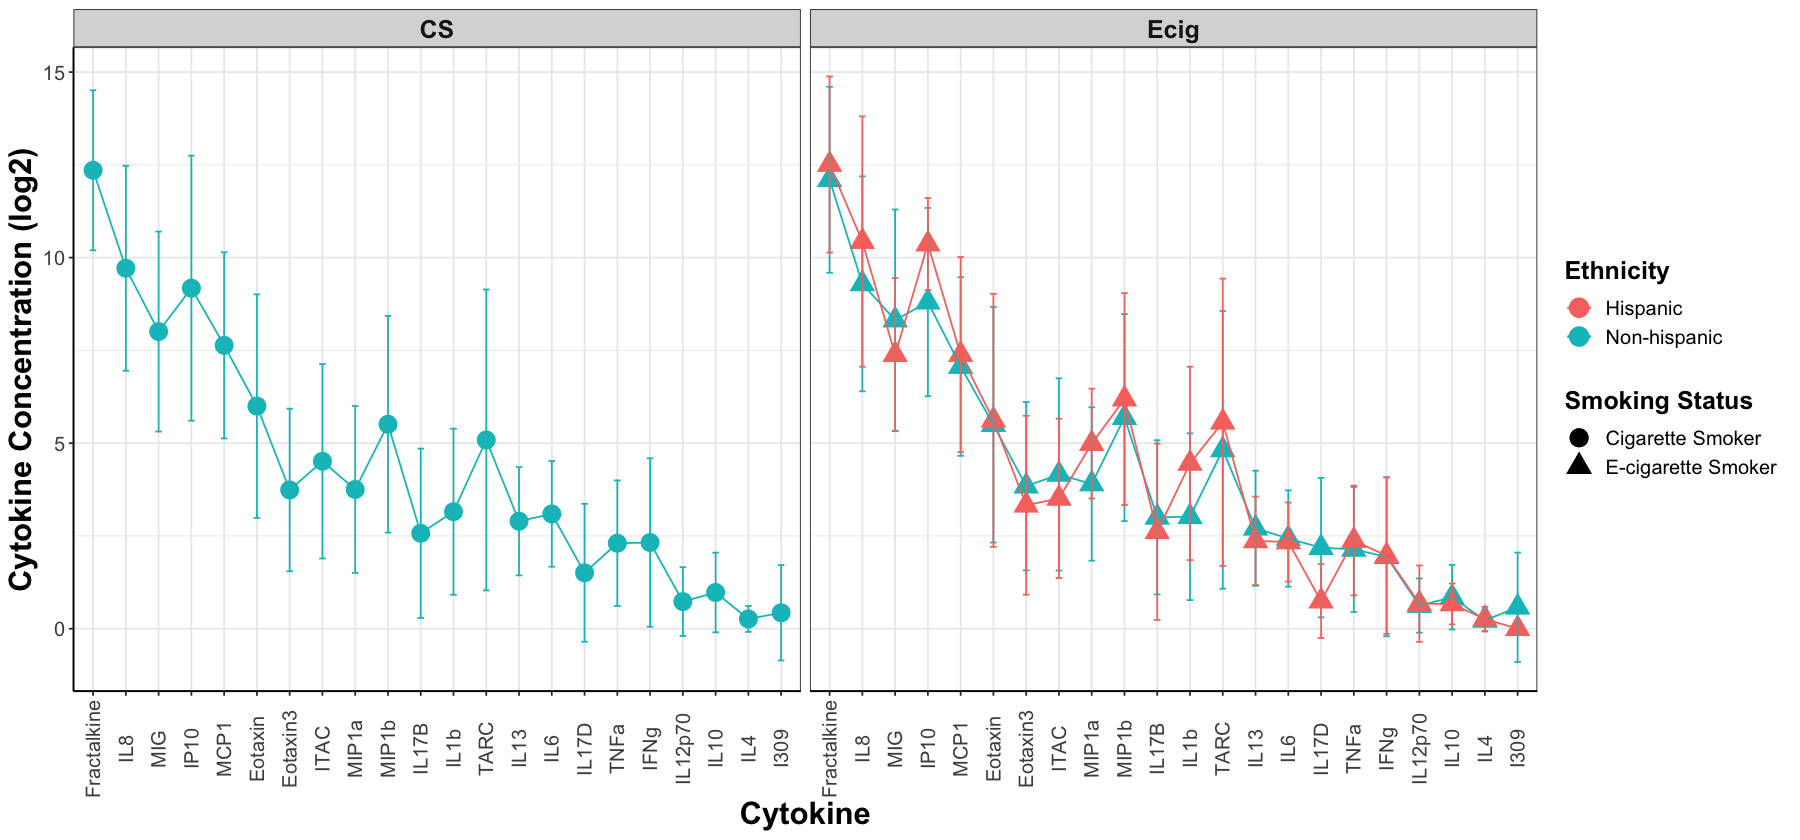

In [22]:
options(repr.plot.width=15, repr.plot.height=7) 
descending_cytokines = c('Fractalkine','IL8','MIG','IP10','MCP1','Eotaxin','Eotaxin3','ITAC','MIP1a','MIP1b','IL17B',
                         'IL1b','TARC','IL13','IL6','IL17D','TNFa','IFNg','IL12p70','IL10','IL4','I309')
cytokines = factor(nonhispanic_smokers_mean_sd_df$protein, levels = descending_cytokines)
ggplot() + 
  geom_point(data = nonhispanic_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, 
                                                     color = ethnicity), size = 5) + 
  geom_point(data = hispanic_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, 
                                                  color = ethnicity), size = 5) +
  geom_line(data = nonhispanic_smokers_mean_sd_df, aes(x = cytokines, y = mean, color = ethnicity,
                                                    group = smoking_status)) + 
  geom_line(data = hispanic_smokers_mean_sd_df, aes(x = cytokines, y = mean, color = ethnicity,
                                                    group = smoking_status)) +
  geom_errorbar(data = nonhispanic_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = ethnicity), width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = hispanic_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = ethnicity), width = .2, position = position_dodge(.9)) +
  facet_wrap(~smoking_status) + 
  theme_bw() + 

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  #labs(color = "Ethnicity", shape = 'Smoking Status') +#legend name
  scale_colour_discrete(name  ="Ethnicity",
                            #breaks=c("Female", "Male"),
                            labels=c("Hispanic", "Non-hispanic")) +
  scale_shape_discrete(name  ="Smoking Status",
                           #breaks=c("Female", "Male"),
                           labels=c("Cigarette Smoker", "E-cigarette Smoker"))

In [23]:
#hispanic vs. nonhispanic Ecig
Eotaxin_ethnicity_Ecig = wilcox.test(hispanic_Eotaxin_Ecig$Conc_pslog2, nonhispanic_Eotaxin_Ecig$Conc_pslog2)
Eotaxin3_ethnicity_Ecig = wilcox.test(hispanic_Eotaxin3_Ecig$Conc_pslog2, nonhispanic_Eotaxin3_Ecig$Conc_pslog2)
Fractalkine_ethnicity_Ecig = wilcox.test(hispanic_Fractalkine_Ecig$Conc_pslog2, nonhispanic_Fractalkine_Ecig$Conc_pslog2)
I309_ethnicity_Ecig = wilcox.test(hispanic_I309_Ecig$Conc_pslog2, nonhispanic_I309_Ecig$Conc_pslog2)
IFNg_ethnicity_Ecig = wilcox.test(hispanic_IFNg_Ecig$Conc_pslog2, nonhispanic_IFNg_Ecig$Conc_pslog2)
IL10_ethnicity_Ecig = wilcox.test(hispanic_IL10_Ecig$Conc_pslog2, nonhispanic_IL10_Ecig$Conc_pslog2)
IL12p70_ethnicity_Ecig = wilcox.test(hispanic_IL12p70_Ecig$Conc_pslog2, nonhispanic_IL12p70_Ecig$Conc_pslog2)
IL13_ethnicity_Ecig = wilcox.test(hispanic_IL13_Ecig$Conc_pslog2, nonhispanic_IL13_Ecig$Conc_pslog2)
IL17B_ethnicity_Ecig = wilcox.test(hispanic_IL17B_Ecig$Conc_pslog2, nonhispanic_IL17B_Ecig$Conc_pslog2)
IL17D_ethnicity_Ecig = wilcox.test(hispanic_IL17D_Ecig$Conc_pslog2, nonhispanic_IL17D_Ecig$Conc_pslog2)
IL1b_ethnicity_Ecig = wilcox.test(hispanic_IL1b_Ecig$Conc_pslog2, nonhispanic_IL1b_Ecig$Conc_pslog2)
IL4_ethnicity_Ecig = wilcox.test(hispanic_IL4_Ecig$Conc_pslog2, nonhispanic_IL4_Ecig$Conc_pslog2)
IL6_ethnicity_Ecig = wilcox.test(hispanic_IL6_Ecig$Conc_pslog2, nonhispanic_IL6_Ecig$Conc_pslog2)
IL8_ethnicity_Ecig = wilcox.test(hispanic_IL8_Ecig$Conc_pslog2, nonhispanic_IL8_Ecig$Conc_pslog2)
IP10_ethnicity_Ecig = wilcox.test(hispanic_IP10_Ecig$Conc_pslog2, nonhispanic_IP10_Ecig$Conc_pslog2)
ITAC_ethnicity_Ecig = wilcox.test(hispanic_ITAC_Ecig$Conc_pslog2, nonhispanic_ITAC_Ecig$Conc_pslog2)
MCP1_ethnicity_Ecig = wilcox.test(hispanic_MCP1_Ecig$Conc_pslog2, nonhispanic_MCP1_Ecig$Conc_pslog2)
MIG_ethnicity_Ecig = wilcox.test(hispanic_MIG_Ecig$Conc_pslog2, nonhispanic_MIG_Ecig$Conc_pslog2)
MIP1a_ethnicity_Ecig = wilcox.test(hispanic_MIP1a_Ecig$Conc_pslog2, nonhispanic_MIP1a_Ecig$Conc_pslog2)
MIP1b_ethnicity_Ecig = wilcox.test(hispanic_MIP1b_Ecig$Conc_pslog2, nonhispanic_MIP1b_Ecig$Conc_pslog2)
TARC_ethnicity_Ecig = wilcox.test(hispanic_TARC_Ecig$Conc_pslog2, nonhispanic_TARC_Ecig$Conc_pslog2)
TNFa_ethnicity_Ecig = wilcox.test(hispanic_TNFa_Ecig$Conc_pslog2, nonhispanic_TNFa_Ecig$Conc_pslog2)

In [24]:
#hispanic vs. nonhispanic Ecig
Eotaxin_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin_ethnicity_Ecig)
Eotaxin3_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin3_ethnicity_Ecig)
Fractalkine_Ecig_tuple = get_stat_pvalue_tuple(Fractalkine_ethnicity_Ecig)
I309_Ecig_tuple = get_stat_pvalue_tuple(I309_ethnicity_Ecig)
IFNg_Ecig_tuple = get_stat_pvalue_tuple(IFNg_ethnicity_Ecig)
IL10_Ecig_tuple = get_stat_pvalue_tuple(IL10_ethnicity_Ecig)
IL12p70_Ecig_tuple = get_stat_pvalue_tuple(IL12p70_ethnicity_Ecig)
IL13_Ecig_tuple = get_stat_pvalue_tuple(IL13_ethnicity_Ecig)
IL17B_Ecig_tuple = get_stat_pvalue_tuple(IL17B_ethnicity_Ecig)
IL17D_Ecig_tuple = get_stat_pvalue_tuple(IL17D_ethnicity_Ecig)
IL1b_Ecig_tuple = get_stat_pvalue_tuple(IL1b_ethnicity_Ecig)
IL4_Ecig_tuple = get_stat_pvalue_tuple(IL4_ethnicity_Ecig)
IL6_Ecig_tuple = get_stat_pvalue_tuple(IL6_ethnicity_Ecig)
IL8_Ecig_tuple = get_stat_pvalue_tuple(IL8_ethnicity_Ecig)
IP10_Ecig_tuple = get_stat_pvalue_tuple(IP10_ethnicity_Ecig)
ITAC_Ecig_tuple = get_stat_pvalue_tuple(ITAC_ethnicity_Ecig)
MCP1_Ecig_tuple = get_stat_pvalue_tuple(MCP1_ethnicity_Ecig)
MIG_Ecig_tuple = get_stat_pvalue_tuple(MIG_ethnicity_Ecig)
MIP1a_Ecig_tuple = get_stat_pvalue_tuple(MIP1a_ethnicity_Ecig)
MIP1b_Ecig_tuple = get_stat_pvalue_tuple(MIP1b_ethnicity_Ecig)
TARC_Ecig_tuple = get_stat_pvalue_tuple(TARC_ethnicity_Ecig)
TNFa_Ecig_tuple = get_stat_pvalue_tuple(TNFa_ethnicity_Ecig)

In [25]:
ethnicity_Ecig_table = table_summary(Eotaxin_Ecig_tuple, Eotaxin3_Ecig_tuple, Fractalkine_Ecig_tuple,I309_Ecig_tuple,
                            IFNg_Ecig_tuple, IL10_Ecig_tuple, IL12p70_Ecig_tuple, IL13_Ecig_tuple, 
                            IL17B_Ecig_tuple, IL17D_Ecig_tuple, IL1b_Ecig_tuple, IL4_Ecig_tuple, IL6_Ecig_tuple,
                            IL8_Ecig_tuple, IP10_Ecig_tuple, ITAC_Ecig_tuple, MCP1_Ecig_tuple, MIG_Ecig_tuple,
                            MIP1a_Ecig_tuple, MIP1b_Ecig_tuple, TARC_Ecig_tuple, TNFa_Ecig_tuple)
ethnicity_Ecig_table

,Statistic,p value
Eotaxin,243.5,0.95443757
Eotaxin3,215.5,0.64768193
Fractalkine,264.0,0.65464774
I309,200.0,0.22229375
IFNg,251.0,0.83923842
IL10,248.0,0.88647968
IL12p70,195.0,0.39177034
IL13,216.0,0.65447195
IL17B,222.5,0.74431670
IL17D,117.0,0.01937893


# Sex

In [26]:
get_sex_subset = function(dataframe, sex, protein, smoking_status){
    #"""
    # Getting concentrations for subjects based on sex for each cytokine based on smoking status (ciagratte or 
    # e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$Sex == sex & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

#male subjects
male_Eotaxin_CS = get_sex_subset(data_df,'M','Eotaxin','CS')
male_Eotaxin3_CS = get_sex_subset(data_df,'M','Eotaxin3','CS')
male_Fractalkine_CS = get_sex_subset(data_df,'M','Fractalkine','CS')
male_I309_CS = get_sex_subset(data_df,'M','I309','CS')
male_IFNg_CS = get_sex_subset(data_df,'M','IFNg','CS')
male_IL10_CS = get_sex_subset(data_df,'M','IL10','CS')
male_IL12p70_CS = get_sex_subset(data_df,'M','IL12p70','CS')
male_IL13_CS = get_sex_subset(data_df,'M','IL13','CS')
male_IL17B_CS = get_sex_subset(data_df,'M','IL17B','CS')
male_IL17D_CS = get_sex_subset(data_df,'M','IL17D','CS')
male_IL1b_CS = get_sex_subset(data_df,'M','IL1b','CS')
male_IL4_CS = get_sex_subset(data_df,'M','IL4','CS')
male_IL6_CS = get_sex_subset(data_df,'M','IL6','CS')
male_IL8_CS = get_sex_subset(data_df,'M','IL8','CS')
male_IP10_CS = get_sex_subset(data_df,'M','IP10','CS')
male_ITAC_CS = get_sex_subset(data_df,'M','ITAC','CS')
male_MCP1_CS = get_sex_subset(data_df,'M','MCP1','CS')
male_MIG_CS = get_sex_subset(data_df,'M','MIG','CS')
male_MIP1a_CS = get_sex_subset(data_df,'M','MIP1a','CS')
male_MIP1b_CS = get_sex_subset(data_df,'M','MIP1b','CS')
male_TARC_CS = get_sex_subset(data_df,'M','TARC','CS')
male_TNFa_CS = get_sex_subset(data_df,'M','TNFa','CS')
male_Eotaxin_Ecig = get_sex_subset(data_df,'M','Eotaxin','Ecig')
male_Eotaxin3_Ecig = get_sex_subset(data_df,'M','Eotaxin3','Ecig')
male_Fractalkine_Ecig = get_sex_subset(data_df,'M','Fractalkine','Ecig')
male_I309_Ecig = get_sex_subset(data_df,'M','I309','Ecig')
male_IFNg_Ecig = get_sex_subset(data_df,'M','IFNg','Ecig')
male_IL10_Ecig = get_sex_subset(data_df,'M','IL10','Ecig')
male_IL12p70_Ecig = get_sex_subset(data_df,'M','IL12p70','Ecig')
male_IL13_Ecig = get_sex_subset(data_df,'M','IL13','Ecig')
male_IL17B_Ecig = get_sex_subset(data_df,'M','IL17B','Ecig')
male_IL17D_Ecig = get_sex_subset(data_df,'M','IL17D','Ecig')
male_IL1b_Ecig = get_sex_subset(data_df,'M','IL1b','Ecig')
male_IL4_Ecig = get_sex_subset(data_df,'M','IL4','Ecig')
male_IL6_Ecig = get_sex_subset(data_df,'M','IL6','Ecig')
male_IL8_Ecig = get_sex_subset(data_df,'M','IL8','Ecig')
male_IP10_Ecig = get_sex_subset(data_df,'M','IP10','Ecig')
male_ITAC_Ecig = get_sex_subset(data_df,'M','ITAC','Ecig')
male_MCP1_Ecig = get_sex_subset(data_df,'M','MCP1','Ecig')
male_MIG_Ecig = get_sex_subset(data_df,'M','MIG','Ecig')
male_MIP1a_Ecig = get_sex_subset(data_df,'M','MIP1a','Ecig')
male_MIP1b_Ecig = get_sex_subset(data_df,'M','MIP1b','Ecig')
male_TARC_Ecig = get_sex_subset(data_df,'M','TARC','Ecig')
male_TNFa_Ecig = get_sex_subset(data_df,'M','TNFa','Ecig')

#female subjects
female_Eotaxin_CS = get_sex_subset(data_df, 'F','Eotaxin','CS')
female_Eotaxin3_CS = get_sex_subset(data_df, 'F','Eotaxin3','CS')
female_Fractalkine_CS = get_sex_subset(data_df, 'F','Fractalkine','CS')
female_I309_CS = get_sex_subset(data_df, 'F','I309','CS')
female_IFNg_CS = get_sex_subset(data_df, 'F','IFNg','CS')
female_IL10_CS = get_sex_subset(data_df, 'F','IL10','CS')
female_IL12p70_CS = get_sex_subset(data_df, 'F','IL12p70','CS')
female_IL13_CS = get_sex_subset(data_df, 'F','IL13','CS')
female_IL17B_CS = get_sex_subset(data_df, 'F','IL17B','CS')
female_IL17D_CS = get_sex_subset(data_df, 'F','IL17D','CS')
female_IL1b_CS = get_sex_subset(data_df, 'F','IL1b','CS')
female_IL4_CS = get_sex_subset(data_df, 'F','IL4','CS')
female_IL6_CS = get_sex_subset(data_df, 'F','IL6','CS')
female_IL8_CS = get_sex_subset(data_df, 'F','IL8','CS')
female_IP10_CS = get_sex_subset(data_df, 'F','IP10','CS')
female_ITAC_CS = get_sex_subset(data_df, 'F','ITAC','CS')
female_MCP1_CS = get_sex_subset(data_df, 'F','MCP1','CS')
female_MIG_CS = get_sex_subset(data_df, 'F','MIG','CS')
female_MIP1a_CS = get_sex_subset(data_df, 'F','MIP1a','CS')
female_MIP1b_CS = get_sex_subset(data_df, 'F','MIP1b','CS')
female_TARC_CS = get_sex_subset(data_df, 'F','TARC','CS')
female_TNFa_CS = get_sex_subset(data_df, 'F','TNFa','CS')
female_Eotaxin_Ecig = get_sex_subset(data_df, 'F','Eotaxin','Ecig')
female_Eotaxin3_Ecig = get_sex_subset(data_df, 'F','Eotaxin3','Ecig')
female_Fractalkine_Ecig = get_sex_subset(data_df, 'F','Fractalkine','Ecig')
female_I309_Ecig = get_sex_subset(data_df, 'F','I309','Ecig')
female_IFNg_Ecig = get_sex_subset(data_df, 'F','IFNg','Ecig')
female_IL10_Ecig = get_sex_subset(data_df, 'F','IL10','Ecig')
female_IL12p70_Ecig = get_sex_subset(data_df, 'F','IL12p70','Ecig')
female_IL13_Ecig = get_sex_subset(data_df, 'F','IL13','Ecig')
female_IL17B_Ecig = get_sex_subset(data_df, 'F','IL17B','Ecig')
female_IL17D_Ecig = get_sex_subset(data_df, 'F','IL17D','Ecig')
female_IL1b_Ecig = get_sex_subset(data_df, 'F','IL1b','Ecig')
female_IL4_Ecig = get_sex_subset(data_df, 'F','IL4','Ecig')
female_IL6_Ecig = get_sex_subset(data_df, 'F','IL6','Ecig')
female_IL8_Ecig = get_sex_subset(data_df, 'F','IL8','Ecig')
female_IP10_Ecig = get_sex_subset(data_df, 'F','IP10','Ecig')
female_ITAC_Ecig = get_sex_subset(data_df, 'F','ITAC','Ecig')
female_MCP1_Ecig = get_sex_subset(data_df, 'F','MCP1','Ecig')
female_MIG_Ecig = get_sex_subset(data_df, 'F','MIG','Ecig')
female_MIP1a_Ecig = get_sex_subset(data_df, 'F','MIP1a','Ecig')
female_MIP1b_Ecig = get_sex_subset(data_df, 'F','MIP1b','Ecig')
female_TARC_Ecig = get_sex_subset(data_df, 'F','TARC','Ecig')
female_TNFa_Ecig = get_sex_subset(data_df, 'F','TNFa','Ecig')

In [27]:
get_sex_mean_sd = function(df_subset, sex, protein, smoking_status){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (mean and sd)

    #"""
    mean = mean(df_subset$Conc_pslog2)
    standard_deviation = sd(df_subset$Conc_pslog2)
    mean_sd_matrix = cbind(mean, standard_deviation, sex, protein, smoking_status) 
    return(mean_sd_matrix)
}
#female subjects
female_smokers_mean_sd_df = data.frame(rbind(get_sex_mean_sd(female_Eotaxin_CS, 'F','Eotaxin','CS'),get_sex_mean_sd(female_Eotaxin3_CS, 'F','Eotaxin3','CS'),
                                 get_sex_mean_sd(female_Fractalkine_CS, 'F','Fractalkine','CS'),get_sex_mean_sd(female_I309_CS, 'F','I309','CS'), 
                                 get_sex_mean_sd(female_IFNg_CS, 'F','IFNg','CS'),get_sex_mean_sd(female_IL10_CS, 'F','IL10','CS'),
                                 get_sex_mean_sd(female_IL12p70_CS, 'F','IL12p70','CS'),get_sex_mean_sd(female_IL13_CS, 'F','IL13','CS'),
                                 get_sex_mean_sd(female_IL17B_CS, 'F','IL17B','CS'),get_sex_mean_sd(female_IL17D_CS, 'F','IL17D','CS'), 
                                 get_sex_mean_sd(female_IL1b_CS, 'F','IL1b','CS'),get_sex_mean_sd(female_IL4_CS, 'F','IL4','CS'),
                                 get_sex_mean_sd(female_IL6_CS, 'F','IL6','CS'),get_sex_mean_sd(female_IL8_CS, 'F','IL8','CS'),
                                 get_sex_mean_sd(female_IP10_CS, 'F','IP10','CS'),get_sex_mean_sd(female_ITAC_CS, 'F','ITAC','CS'),
                                 get_sex_mean_sd(female_MCP1_CS, 'F','MCP1','CS'),get_sex_mean_sd(female_MIG_CS, 'F','MIG','CS'),
                                 get_sex_mean_sd(female_MIP1a_CS, 'F','MIP1a','CS'),get_sex_mean_sd(female_MIP1b_CS, 'F','MIP1b','CS'),
                                 get_sex_mean_sd(female_TARC_CS, 'F','TARC','CS'),get_sex_mean_sd(female_TNFa_CS, 'F','TNFa','CS'),
                                 get_sex_mean_sd(female_Eotaxin_Ecig, 'F','Eotaxin','Ecig'),get_sex_mean_sd(female_Eotaxin3_Ecig, 'F','Eotaxin3','Ecig'),
                                 get_sex_mean_sd(female_Fractalkine_Ecig, 'F','Fractalkine','Ecig'),get_sex_mean_sd(female_I309_Ecig, 'F','I309','Ecig'),
                                 get_sex_mean_sd(female_IFNg_Ecig, 'F','IFNg','Ecig'),get_sex_mean_sd(female_IL10_Ecig, 'F','IL10','Ecig'),
                                 get_sex_mean_sd(female_IL12p70_Ecig, 'F','IL12p70','Ecig'),get_sex_mean_sd(female_IL13_Ecig, 'F','IL13','Ecig'),
                                 get_sex_mean_sd(female_IL17B_Ecig, 'F','IL17B','Ecig'),get_sex_mean_sd(female_IL17D_Ecig, 'F','IL17D','Ecig'),
                                 get_sex_mean_sd(female_IL1b_Ecig, 'F','IL1b','Ecig'),get_sex_mean_sd(female_IL4_Ecig, 'F','IL4','Ecig'),
                                 get_sex_mean_sd(female_IL6_Ecig, 'F','IL6','Ecig'),get_sex_mean_sd(female_IL8_Ecig, 'F','IL8','Ecig'),
                                 get_sex_mean_sd(female_IP10_Ecig, 'F','IP10','Ecig'),get_sex_mean_sd(female_ITAC_Ecig, 'F','ITAC','Ecig'),
                                 get_sex_mean_sd(female_MCP1_Ecig, 'F','MCP1','Ecig'),get_sex_mean_sd(female_MIG_Ecig, 'F','MIG','Ecig'),
                                 get_sex_mean_sd(female_MIP1a_Ecig, 'F','MIP1a','Ecig'),get_sex_mean_sd(female_MIP1b_Ecig, 'F','MIP1b','Ecig'),
                                 get_sex_mean_sd(female_TARC_Ecig, 'F','TARC','Ecig'),get_sex_mean_sd(female_TNFa_Ecig, 'F','TNFa','Ecig')))

#male subjects
male_smokers_mean_sd_df = data.frame(rbind(get_sex_mean_sd(male_Eotaxin_CS, 'M','Eotaxin','CS'),get_sex_mean_sd(male_Eotaxin3_CS, 'M','Eotaxin3','CS'),
                                 get_sex_mean_sd(male_Fractalkine_CS, 'M','Fractalkine','CS'),get_sex_mean_sd(male_I309_CS, 'M','I309','CS'), 
                                 get_sex_mean_sd(male_IFNg_CS, 'M','IFNg','CS'),get_sex_mean_sd(male_IL10_CS, 'M','IL10','CS'),
                                 get_sex_mean_sd(male_IL12p70_CS, 'M','IL12p70','CS'),get_sex_mean_sd(male_IL13_CS, 'M','IL13','CS'),
                                 get_sex_mean_sd(male_IL17B_CS, 'M','IL17B','CS'),get_sex_mean_sd(male_IL17D_CS, 'M','IL17D','CS'), 
                                 get_sex_mean_sd(male_IL1b_CS, 'M','IL1b','CS'),get_sex_mean_sd(male_IL4_CS, 'M','IL4','CS'),
                                 get_sex_mean_sd(male_IL6_CS, 'M','IL6','CS'),get_sex_mean_sd(male_IL8_CS, 'M','IL8','CS'),
                                 get_sex_mean_sd(male_IP10_CS, 'M','IP10','CS'),get_sex_mean_sd(male_ITAC_CS, 'M','ITAC','CS'),
                                 get_sex_mean_sd(male_MCP1_CS, 'M','MCP1','CS'),get_sex_mean_sd(male_MIG_CS, 'M','MIG','CS'),
                                 get_sex_mean_sd(male_MIP1a_CS, 'M','MIP1a','CS'),get_sex_mean_sd(male_MIP1b_CS, 'M','MIP1b','CS'),
                                 get_sex_mean_sd(male_TARC_CS, 'M','TARC','CS'),get_sex_mean_sd(male_TNFa_CS, 'M','TNFa','CS'),
                                 get_sex_mean_sd(male_Eotaxin_Ecig, 'M','Eotaxin','Ecig'),get_sex_mean_sd(male_Eotaxin3_Ecig, 'M','Eotaxin3','Ecig'),
                                 get_sex_mean_sd(male_Fractalkine_Ecig, 'M','Fractalkine','Ecig'),get_sex_mean_sd(male_I309_Ecig, 'M','I309','Ecig'),
                                 get_sex_mean_sd(male_IFNg_Ecig, 'M','IFNg','Ecig'),get_sex_mean_sd(male_IL10_Ecig, 'M','IL10','Ecig'),
                                 get_sex_mean_sd(male_IL12p70_Ecig, 'M','IL12p70','Ecig'),get_sex_mean_sd(male_IL13_Ecig, 'M','IL13','Ecig'),
                                 get_sex_mean_sd(male_IL17B_Ecig, 'M','IL17B','Ecig'),get_sex_mean_sd(male_IL17D_Ecig, 'M','IL17D','Ecig'),
                                 get_sex_mean_sd(male_IL1b_Ecig, 'M','IL1b','Ecig'),get_sex_mean_sd(male_IL4_Ecig, 'M','IL4','Ecig'),
                                 get_sex_mean_sd(male_IL6_Ecig, 'M','IL6','Ecig'),get_sex_mean_sd(male_IL8_Ecig, 'M','IL8','Ecig'),
                                 get_sex_mean_sd(male_IP10_Ecig, 'M','IP10','Ecig'),get_sex_mean_sd(male_ITAC_Ecig, 'M','ITAC','Ecig'),
                                 get_sex_mean_sd(male_MCP1_Ecig, 'M','MCP1','Ecig'),get_sex_mean_sd(male_MIG_Ecig, 'M','MIG','Ecig'),
                                 get_sex_mean_sd(male_MIP1a_Ecig, 'M','MIP1a','Ecig'),get_sex_mean_sd(male_MIP1b_Ecig, 'M','MIP1b','Ecig'),
                                 get_sex_mean_sd(male_TARC_Ecig, 'M','TARC','Ecig'),get_sex_mean_sd(male_TNFa_Ecig, 'M','TNFa','Ecig')))

male_smokers_mean_sd_df$mean = as.numeric(male_smokers_mean_sd_df$mean)
female_smokers_mean_sd_df$mean = as.numeric(female_smokers_mean_sd_df$mean)
male_smokers_mean_sd_df$standard_deviation = as.numeric(male_smokers_mean_sd_df$standard_deviation)
female_smokers_mean_sd_df$standard_deviation = as.numeric(female_smokers_mean_sd_df$standard_deviation)

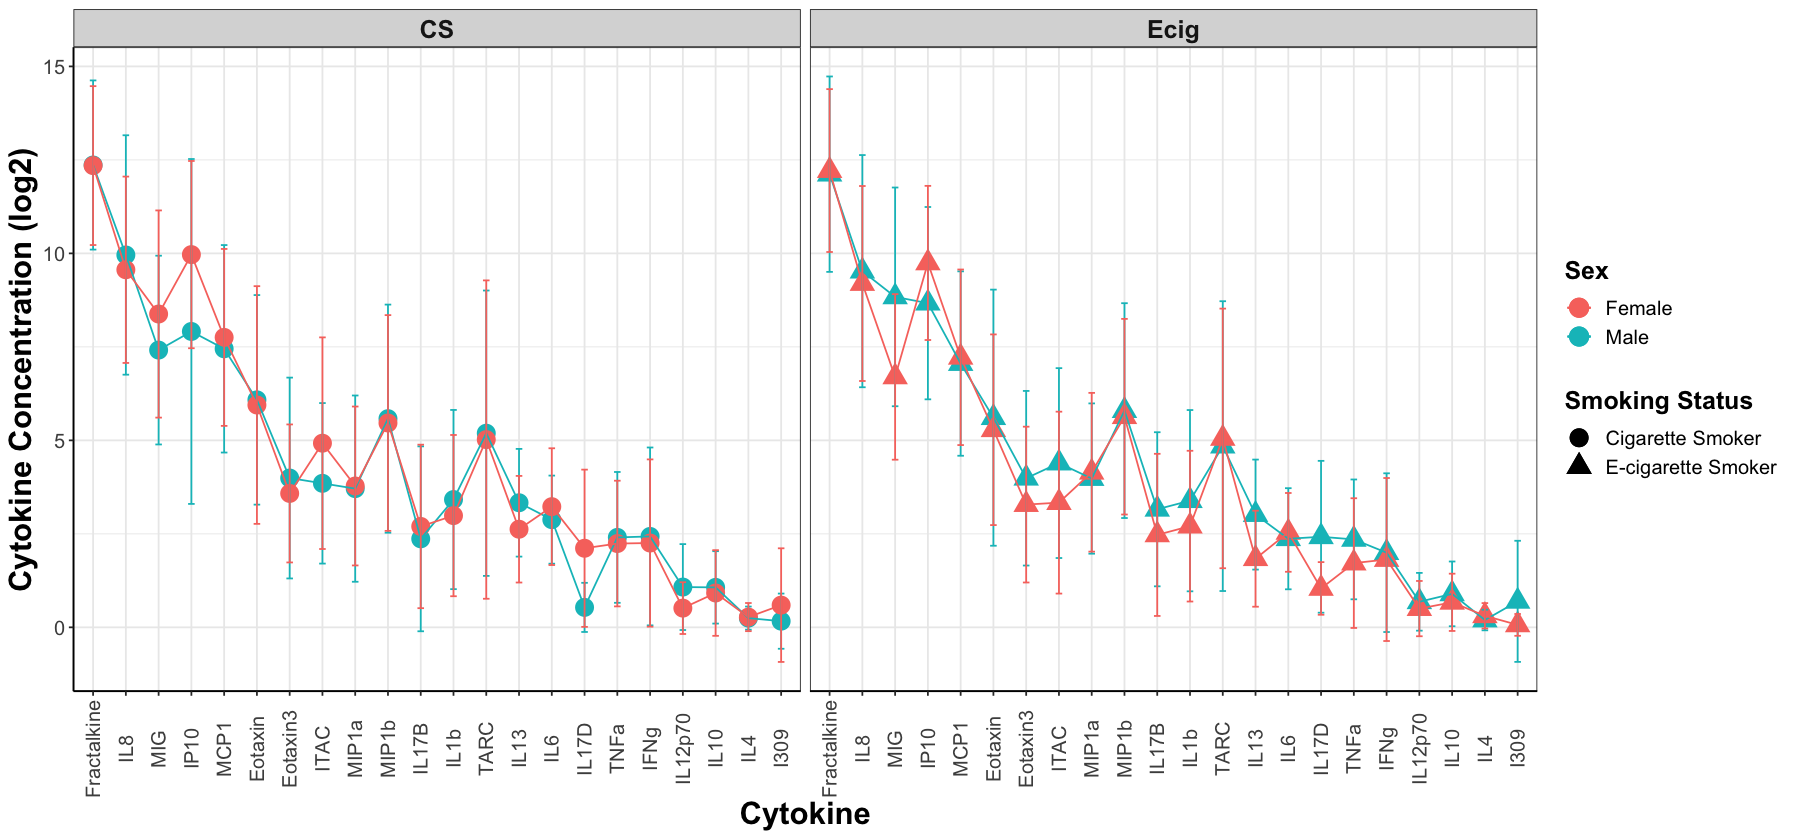

In [28]:
options(repr.plot.width=15, repr.plot.height=7) 
descending_cytokines = c('Fractalkine','IL8','MIG','IP10','MCP1','Eotaxin','Eotaxin3','ITAC','MIP1a','MIP1b','IL17B',
                         'IL1b','TARC','IL13','IL6','IL17D','TNFa','IFNg','IL12p70','IL10','IL4','I309')
cytokines = factor(male_smokers_mean_sd_df$protein, levels = descending_cytokines)
ggplot() + 
  geom_point(data = male_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, color = sex), size = 5) + 
  geom_point(data = female_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, color = sex), size = 5) +
  geom_line(data = male_smokers_mean_sd_df, aes(x = cytokines, y = mean, color = sex, group = smoking_status)) + 
  geom_line(data = female_smokers_mean_sd_df, aes(x = cytokines, y = mean, color = sex, group = smoking_status)) +
  geom_errorbar(data = male_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = sex), width = .2,, position = position_dodge(.9)) +
  geom_errorbar(data = female_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = sex), width = .2, position = position_dodge(.9)) +
  facet_wrap(~smoking_status) + 
  theme_bw() + 

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes female
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_colour_discrete(name  ="Sex",
                            #breaks=c("Female", "Male"),
                            labels=c("Female", "Male")) +
  scale_shape_discrete(name  ="Smoking Status",
                           #breaks=c("Female", "Male"),
                           labels=c("Cigarette Smoker", "E-cigarette Smoker"))

In [29]:
#male vs. non-male CS
Eotaxin_sex_CS = wilcox.test(male_Eotaxin_CS$Conc_pslog2, female_Eotaxin_CS$Conc_pslog2)
Eotaxin3_sex_CS = wilcox.test(male_Eotaxin3_CS$Conc_pslog2, female_Eotaxin3_CS$Conc_pslog2)
Fractalkine_sex_CS = wilcox.test(male_Fractalkine_CS$Conc_pslog2, female_Fractalkine_CS$Conc_pslog2)
I309_sex_CS = wilcox.test(male_I309_CS$Conc_pslog2, female_I309_CS$Conc_pslog2)
IFNg_sex_CS = wilcox.test(male_IFNg_CS$Conc_pslog2, female_IFNg_CS$Conc_pslog2)
IL10_sex_CS = wilcox.test(male_IL10_CS$Conc_pslog2, female_IL10_CS$Conc_pslog2)
IL12p70_sex_CS = wilcox.test(male_IL12p70_CS$Conc_pslog2, female_IL12p70_CS$Conc_pslog2)
IL13_sex_CS = wilcox.test(male_IL13_CS$Conc_pslog2, female_IL13_CS$Conc_pslog2)
IL17B_sex_CS = wilcox.test(male_IL17B_CS$Conc_pslog2, female_IL17B_CS$Conc_pslog2)
IL17D_sex_CS = wilcox.test(male_IL17D_CS$Conc_pslog2, female_IL17D_CS$Conc_pslog2)
IL1b_sex_CS = wilcox.test(male_IL1b_CS$Conc_pslog2, female_IL1b_CS$Conc_pslog2)
IL4_sex_CS = wilcox.test(male_IL4_CS$Conc_pslog2, female_IL4_CS$Conc_pslog2)
IL6_sex_CS = wilcox.test(male_IL6_CS$Conc_pslog2, female_IL6_CS$Conc_pslog2)
IL8_sex_CS = wilcox.test(male_IL8_CS$Conc_pslog2, female_IL8_CS$Conc_pslog2)
IP10_sex_CS = wilcox.test(male_IP10_CS$Conc_pslog2, female_IP10_CS$Conc_pslog2)
ITAC_sex_CS = wilcox.test(male_ITAC_CS$Conc_pslog2, female_ITAC_CS$Conc_pslog2)
MCP1_sex_CS = wilcox.test(male_MCP1_CS$Conc_pslog2, female_MCP1_CS$Conc_pslog2)
MIG_sex_CS = wilcox.test(male_MIG_CS$Conc_pslog2, female_MIG_CS$Conc_pslog2)
MIP1a_sex_CS = wilcox.test(male_MIP1a_CS$Conc_pslog2, female_MIP1a_CS$Conc_pslog2)
MIP1b_sex_CS = wilcox.test(male_MIP1b_CS$Conc_pslog2, female_MIP1b_CS$Conc_pslog2)
TARC_sex_CS = wilcox.test(male_TARC_CS$Conc_pslog2, female_TARC_CS$Conc_pslog2)
TNFa_sex_CS = wilcox.test(male_TNFa_CS$Conc_pslog2, female_TNFa_CS$Conc_pslog2)

#male vs. non-male Ecig
Eotaxin_sex_Ecig = wilcox.test(male_Eotaxin_Ecig$Conc_pslog2, female_Eotaxin_Ecig$Conc_pslog2)
Eotaxin3_sex_Ecig = wilcox.test(male_Eotaxin3_Ecig$Conc_pslog2, female_Eotaxin3_Ecig$Conc_pslog2)
Fractalkine_sex_Ecig = wilcox.test(male_Fractalkine_Ecig$Conc_pslog2, female_Fractalkine_Ecig$Conc_pslog2)
I309_sex_Ecig = wilcox.test(male_I309_Ecig$Conc_pslog2, female_I309_Ecig$Conc_pslog2)
IFNg_sex_Ecig = wilcox.test(male_IFNg_Ecig$Conc_pslog2, female_IFNg_Ecig$Conc_pslog2)
IL10_sex_Ecig = wilcox.test(male_IL10_Ecig$Conc_pslog2, female_IL10_Ecig$Conc_pslog2)
IL12p70_sex_Ecig = wilcox.test(male_IL12p70_Ecig$Conc_pslog2, female_IL12p70_Ecig$Conc_pslog2)
IL13_sex_Ecig = wilcox.test(male_IL13_Ecig$Conc_pslog2, female_IL13_Ecig$Conc_pslog2)
IL17B_sex_Ecig = wilcox.test(male_IL17B_Ecig$Conc_pslog2, female_IL17B_Ecig$Conc_pslog2)
IL17D_sex_Ecig = wilcox.test(male_IL17D_Ecig$Conc_pslog2, female_IL17D_Ecig$Conc_pslog2)
IL1b_sex_Ecig = wilcox.test(male_IL1b_Ecig$Conc_pslog2, female_IL1b_Ecig$Conc_pslog2)
IL4_sex_Ecig = wilcox.test(male_IL4_Ecig$Conc_pslog2, female_IL4_Ecig$Conc_pslog2)
IL6_sex_Ecig = wilcox.test(male_IL6_Ecig$Conc_pslog2, female_IL6_Ecig$Conc_pslog2)
IL8_sex_Ecig = wilcox.test(male_IL8_Ecig$Conc_pslog2, female_IL8_Ecig$Conc_pslog2)
IP10_sex_Ecig = wilcox.test(male_IP10_Ecig$Conc_pslog2, female_IP10_Ecig$Conc_pslog2)
ITAC_sex_Ecig = wilcox.test(male_ITAC_Ecig$Conc_pslog2, female_ITAC_Ecig$Conc_pslog2)
MCP1_sex_Ecig = wilcox.test(male_MCP1_Ecig$Conc_pslog2, female_MCP1_Ecig$Conc_pslog2)
MIG_sex_Ecig = wilcox.test(male_MIG_Ecig$Conc_pslog2, female_MIG_Ecig$Conc_pslog2)
MIP1a_sex_Ecig = wilcox.test(male_MIP1a_Ecig$Conc_pslog2, female_MIP1a_Ecig$Conc_pslog2)
MIP1b_sex_Ecig = wilcox.test(male_MIP1b_Ecig$Conc_pslog2, female_MIP1b_Ecig$Conc_pslog2)
TARC_sex_Ecig = wilcox.test(male_TARC_Ecig$Conc_pslog2, female_TARC_Ecig$Conc_pslog2)
TNFa_sex_Ecig = wilcox.test(male_TNFa_Ecig$Conc_pslog2, female_TNFa_Ecig$Conc_pslog2)

Warning message in wilcox.test.default(male_Eotaxin_CS$Conc_pslog2, female_Eotaxin_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(male_Eotaxin3_CS$Conc_pslog2, female_Eotaxin3_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(male_I309_CS$Conc_pslog2, female_I309_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(male_IFNg_CS$Conc_pslog2, female_IFNg_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(male_IL10_CS$Conc_pslog2, female_IL10_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(male_IL12p70_CS$Conc_pslog2, female_IL12p70_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(male_IL13_CS$Conc_pslog2, female_IL13_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.defa

In [30]:
#male vs. female CS
Eotaxin_CS_tuple = get_stat_pvalue_tuple(Eotaxin_sex_CS)
Eotaxin3_CS_tuple = get_stat_pvalue_tuple(Eotaxin3_sex_CS)
Fractalkine_CS_tuple = get_stat_pvalue_tuple(Fractalkine_sex_CS)
I309_CS_tuple = get_stat_pvalue_tuple(I309_sex_CS)
IFNg_CS_tuple = get_stat_pvalue_tuple(IFNg_sex_CS)
IL10_CS_tuple = get_stat_pvalue_tuple(IL10_sex_CS)
IL12p70_CS_tuple = get_stat_pvalue_tuple(IL12p70_sex_CS)
IL13_CS_tuple = get_stat_pvalue_tuple(IL13_sex_CS)
IL17B_CS_tuple = get_stat_pvalue_tuple(IL17B_sex_CS)
IL17D_CS_tuple = get_stat_pvalue_tuple(IL17D_sex_CS)
IL1b_CS_tuple = get_stat_pvalue_tuple(IL1b_sex_CS)
IL4_CS_tuple = get_stat_pvalue_tuple(IL4_sex_CS)
IL6_CS_tuple = get_stat_pvalue_tuple(IL6_sex_CS)
IL8_CS_tuple = get_stat_pvalue_tuple(IL8_sex_CS)
IP10_CS_tuple = get_stat_pvalue_tuple(IP10_sex_CS)
ITAC_CS_tuple = get_stat_pvalue_tuple(ITAC_sex_CS)
MCP1_CS_tuple = get_stat_pvalue_tuple(MCP1_sex_CS)
MIG_CS_tuple = get_stat_pvalue_tuple(MIG_sex_CS)
MIP1a_CS_tuple = get_stat_pvalue_tuple(MIP1a_sex_CS)
MIP1b_CS_tuple = get_stat_pvalue_tuple(MIP1b_sex_CS)
TARC_CS_tuple = get_stat_pvalue_tuple(TARC_sex_CS)
TNFa_CS_tuple = get_stat_pvalue_tuple(TNFa_sex_CS)

#male vs. female Ecig
Eotaxin_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin_sex_Ecig)
Eotaxin3_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin3_sex_Ecig)
Fractalkine_Ecig_tuple = get_stat_pvalue_tuple(Fractalkine_sex_Ecig)
I309_Ecig_tuple = get_stat_pvalue_tuple(I309_sex_Ecig)
IFNg_Ecig_tuple = get_stat_pvalue_tuple(IFNg_sex_Ecig)
IL10_Ecig_tuple = get_stat_pvalue_tuple(IL10_sex_Ecig)
IL12p70_Ecig_tuple = get_stat_pvalue_tuple(IL12p70_sex_Ecig)
IL13_Ecig_tuple = get_stat_pvalue_tuple(IL13_sex_Ecig)
IL17B_Ecig_tuple = get_stat_pvalue_tuple(IL17B_sex_Ecig)
IL17D_Ecig_tuple = get_stat_pvalue_tuple(IL17D_sex_Ecig)
IL1b_Ecig_tuple = get_stat_pvalue_tuple(IL1b_sex_Ecig)
IL4_Ecig_tuple = get_stat_pvalue_tuple(IL4_sex_Ecig)
IL6_Ecig_tuple = get_stat_pvalue_tuple(IL6_sex_Ecig)
IL8_Ecig_tuple = get_stat_pvalue_tuple(IL8_sex_Ecig)
IP10_Ecig_tuple = get_stat_pvalue_tuple(IP10_sex_Ecig)
ITAC_Ecig_tuple = get_stat_pvalue_tuple(ITAC_sex_Ecig)
MCP1_Ecig_tuple = get_stat_pvalue_tuple(MCP1_sex_Ecig)
MIG_Ecig_tuple = get_stat_pvalue_tuple(MIG_sex_Ecig)
MIP1a_Ecig_tuple = get_stat_pvalue_tuple(MIP1a_sex_Ecig)
MIP1b_Ecig_tuple = get_stat_pvalue_tuple(MIP1b_sex_Ecig)
TARC_Ecig_tuple = get_stat_pvalue_tuple(TARC_sex_Ecig)
TNFa_Ecig_tuple = get_stat_pvalue_tuple(TNFa_sex_Ecig)

In [31]:
sex_CS_table = table_summary(Eotaxin_CS_tuple, Eotaxin3_CS_tuple, Fractalkine_CS_tuple,I309_CS_tuple,
                            IFNg_CS_tuple, IL10_CS_tuple, IL12p70_CS_tuple, IL13_CS_tuple, 
                            IL17B_CS_tuple, IL17D_CS_tuple, IL1b_CS_tuple, IL4_CS_tuple, IL6_CS_tuple,
                            IL8_CS_tuple, IP10_CS_tuple, ITAC_CS_tuple, MCP1_CS_tuple, MIG_CS_tuple,
                            MIP1a_CS_tuple, MIP1b_CS_tuple, TARC_CS_tuple, TNFa_CS_tuple)
sex_Ecig_table = table_summary(Eotaxin_Ecig_tuple, Eotaxin3_Ecig_tuple, Fractalkine_Ecig_tuple,I309_Ecig_tuple,
                            IFNg_Ecig_tuple, IL10_Ecig_tuple, IL12p70_Ecig_tuple, IL13_Ecig_tuple, 
                            IL17B_Ecig_tuple, IL17D_Ecig_tuple, IL1b_Ecig_tuple, IL4_Ecig_tuple, IL6_Ecig_tuple,
                            IL8_Ecig_tuple, IP10_Ecig_tuple, ITAC_Ecig_tuple, MCP1_Ecig_tuple, MIG_Ecig_tuple,
                            MIP1a_Ecig_tuple, MIP1b_Ecig_tuple, TARC_Ecig_tuple, TNFa_Ecig_tuple)
sex_table = cbind(sex_CS_table, sex_Ecig_table)
sex_table

,Statistic,p value,Statistic,p value
Eotaxin,336.0,0.770545056,512.5,0.666512000
Eotaxin3,340.0,0.713671510,554.5,0.319085286
Fractalkine,319.0,0.992566884,505.0,0.743621685
I309,285.5,0.249058992,549.5,0.131682356
IFNg,342.0,0.684519942,480.0,1.000000000
IL10,366.5,0.386904359,571.0,0.225212434
IL12p70,403.5,0.114897754,578.0,0.184568270
IL13,422.5,0.054995176,700.0,0.003116783
IL17B,295.0,0.637887659,565.5,0.248874622
IL17D,169.0,0.003838204,672.0,0.009749431


# Age

In [32]:
get_under30age_subset = function(dataframe, protein, smoking_status){
    #"""
    # Getting concentrations for subjects under age 30 for each cytokine based on smoking status (ciagratte or 
    # e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$Age < 30 & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

under30_Eotaxin_CS = get_under30age_subset(data_df,'Eotaxin','CS')
under30_Eotaxin3_CS = get_under30age_subset(data_df,'Eotaxin3','CS')
under30_Fractalkine_CS = get_under30age_subset(data_df,'Fractalkine','CS')
under30_I309_CS = get_under30age_subset(data_df,'I309','CS')
under30_IFNg_CS = get_under30age_subset(data_df,'IFNg','CS')
under30_IL10_CS = get_under30age_subset(data_df,'IL10','CS')
under30_IL12p70_CS = get_under30age_subset(data_df,'IL12p70','CS')
under30_IL13_CS = get_under30age_subset(data_df,'IL13','CS')
under30_IL17B_CS = get_under30age_subset(data_df,'IL17B','CS')
under30_IL17D_CS = get_under30age_subset(data_df,'IL17D','CS')
under30_IL1b_CS = get_under30age_subset(data_df,'IL1b','CS')
under30_IL4_CS = get_under30age_subset(data_df,'IL4','CS')
under30_IL6_CS = get_under30age_subset(data_df,'IL6','CS')
under30_IL8_CS = get_under30age_subset(data_df,'IL8','CS')
under30_IP10_CS = get_under30age_subset(data_df,'IP10','CS')
under30_ITAC_CS = get_under30age_subset(data_df,'ITAC','CS')
under30_MCP1_CS = get_under30age_subset(data_df,'MCP1','CS')
under30_MIG_CS = get_under30age_subset(data_df,'MIG','CS')
under30_MIP1a_CS = get_under30age_subset(data_df,'MIP1a','CS')
under30_MIP1b_CS = get_under30age_subset(data_df,'MIP1b','CS')
under30_TARC_CS = get_under30age_subset(data_df,'TARC','CS')
under30_TNFa_CS = get_under30age_subset(data_df,'TNFa','CS')
under30_Eotaxin_Ecig = get_under30age_subset(data_df,'Eotaxin','Ecig')
under30_Eotaxin3_Ecig = get_under30age_subset(data_df,'Eotaxin3','Ecig')
under30_Fractalkine_Ecig = get_under30age_subset(data_df,'Fractalkine','Ecig')
under30_I309_Ecig = get_under30age_subset(data_df,'I309','Ecig')
under30_IFNg_Ecig = get_under30age_subset(data_df,'IFNg','Ecig')
under30_IL10_Ecig = get_under30age_subset(data_df,'IL10','Ecig')
under30_IL12p70_Ecig = get_under30age_subset(data_df,'IL12p70','Ecig')
under30_IL13_Ecig = get_under30age_subset(data_df,'IL13','Ecig')
under30_IL17B_Ecig = get_under30age_subset(data_df,'IL17B','Ecig')
under30_IL17D_Ecig = get_under30age_subset(data_df,'IL17D','Ecig')
under30_IL1b_Ecig = get_under30age_subset(data_df,'IL1b','Ecig')
under30_IL4_Ecig = get_under30age_subset(data_df,'IL4','Ecig')
under30_IL6_Ecig = get_under30age_subset(data_df,'IL6','Ecig')
under30_IL8_Ecig = get_under30age_subset(data_df,'IL8','Ecig')
under30_IP10_Ecig = get_under30age_subset(data_df,'IP10','Ecig')
under30_ITAC_Ecig = get_under30age_subset(data_df,'ITAC','Ecig')
under30_MCP1_Ecig = get_under30age_subset(data_df,'MCP1','Ecig')
under30_MIG_Ecig = get_under30age_subset(data_df,'MIG','Ecig')
under30_MIP1a_Ecig = get_under30age_subset(data_df,'MIP1a','Ecig')
under30_MIP1b_Ecig = get_under30age_subset(data_df,'MIP1b','Ecig')
under30_TARC_Ecig = get_under30age_subset(data_df,'TARC','Ecig')
under30_TNFa_Ecig = get_under30age_subset(data_df,'TNFa','Ecig')

In [33]:
get_over30age_subset = function(dataframe, protein, smoking_status){
    #"""
    # Getting concentrations for subjects over age 30 for each cytokine based on smoking status (ciagratte or 
    # e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$Age > 30 & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

over30_Eotaxin_CS = get_over30age_subset(data_df,'Eotaxin','CS')
over30_Eotaxin3_CS = get_over30age_subset(data_df,'Eotaxin3','CS')
over30_Fractalkine_CS = get_over30age_subset(data_df,'Fractalkine','CS')
over30_I309_CS = get_over30age_subset(data_df,'I309','CS')
over30_IFNg_CS = get_over30age_subset(data_df,'IFNg','CS')
over30_IL10_CS = get_over30age_subset(data_df,'IL10','CS')
over30_IL12p70_CS = get_over30age_subset(data_df,'IL12p70','CS')
over30_IL13_CS = get_over30age_subset(data_df,'IL13','CS')
over30_IL17B_CS = get_over30age_subset(data_df,'IL17B','CS')
over30_IL17D_CS = get_over30age_subset(data_df,'IL17D','CS')
over30_IL1b_CS = get_over30age_subset(data_df,'IL1b','CS')
over30_IL4_CS = get_over30age_subset(data_df,'IL4','CS')
over30_IL6_CS = get_over30age_subset(data_df,'IL6','CS')
over30_IL8_CS = get_over30age_subset(data_df,'IL8','CS')
over30_IP10_CS = get_over30age_subset(data_df,'IP10','CS')
over30_ITAC_CS = get_over30age_subset(data_df,'ITAC','CS')
over30_MCP1_CS = get_over30age_subset(data_df,'MCP1','CS')
over30_MIG_CS = get_over30age_subset(data_df,'MIG','CS')
over30_MIP1a_CS = get_over30age_subset(data_df,'MIP1a','CS')
over30_MIP1b_CS = get_over30age_subset(data_df,'MIP1b','CS')
over30_TARC_CS = get_over30age_subset(data_df,'TARC','CS')
over30_TNFa_CS = get_over30age_subset(data_df,'TNFa','CS')
over30_Eotaxin_Ecig = get_over30age_subset(data_df,'Eotaxin','Ecig')
over30_Eotaxin3_Ecig = get_over30age_subset(data_df,'Eotaxin3','Ecig')
over30_Fractalkine_Ecig = get_over30age_subset(data_df,'Fractalkine','Ecig')
over30_I309_Ecig = get_over30age_subset(data_df,'I309','Ecig')
over30_IFNg_Ecig = get_over30age_subset(data_df,'IFNg','Ecig')
over30_IL10_Ecig = get_over30age_subset(data_df,'IL10','Ecig')
over30_IL12p70_Ecig = get_over30age_subset(data_df,'IL12p70','Ecig')
over30_IL13_Ecig = get_over30age_subset(data_df,'IL13','Ecig')
over30_IL17B_Ecig = get_over30age_subset(data_df,'IL17B','Ecig')
over30_IL17D_Ecig = get_over30age_subset(data_df,'IL17D','Ecig')
over30_IL1b_Ecig = get_over30age_subset(data_df,'IL1b','Ecig')
over30_IL4_Ecig = get_over30age_subset(data_df,'IL4','Ecig')
over30_IL6_Ecig = get_over30age_subset(data_df,'IL6','Ecig')
over30_IL8_Ecig = get_over30age_subset(data_df,'IL8','Ecig')
over30_IP10_Ecig = get_over30age_subset(data_df,'IP10','Ecig')
over30_ITAC_Ecig = get_over30age_subset(data_df,'ITAC','Ecig')
over30_MCP1_Ecig = get_over30age_subset(data_df,'MCP1','Ecig')
over30_MIG_Ecig = get_over30age_subset(data_df,'MIG','Ecig')
over30_MIP1a_Ecig = get_over30age_subset(data_df,'MIP1a','Ecig')
over30_MIP1b_Ecig = get_over30age_subset(data_df,'MIP1b','Ecig')
over30_TARC_Ecig = get_over30age_subset(data_df,'TARC','Ecig')
over30_TNFa_Ecig = get_over30age_subset(data_df,'TNFa','Ecig')

In [34]:
get_age_mean_sd = function(df_subset, age, protein, smoking_status){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (mean and sd)

    #"""
    mean = mean(df_subset$Conc_pslog2)
    standard_deviation = sd(df_subset$Conc_pslog2)
    mean_sd_matrix = cbind(mean, standard_deviation, age, protein, smoking_status) 
    return(mean_sd_matrix)
}
#under30 subjects
under30_smokers_mean_sd_df = data.frame(rbind(get_age_mean_sd(under30_Eotaxin_CS, '29','Eotaxin','CS'),get_age_mean_sd(under30_Eotaxin3_CS, '29','Eotaxin3','CS'),
                                 get_age_mean_sd(under30_Fractalkine_CS, '29','Fractalkine','CS'),get_age_mean_sd(under30_I309_CS, '29','I309','CS'), 
                                 get_age_mean_sd(under30_IFNg_CS, '29','IFNg','CS'),get_age_mean_sd(under30_IL10_CS, '29','IL10','CS'),
                                 get_age_mean_sd(under30_IL12p70_CS, '29','IL12p70','CS'),get_age_mean_sd(under30_IL13_CS, '29','IL13','CS'),
                                 get_age_mean_sd(under30_IL17B_CS, '29','IL17B','CS'),get_age_mean_sd(under30_IL17D_CS, '29','IL17D','CS'), 
                                 get_age_mean_sd(under30_IL1b_CS, '29','IL1b','CS'),get_age_mean_sd(under30_IL4_CS, '29','IL4','CS'),
                                 get_age_mean_sd(under30_IL6_CS, '29','IL6','CS'),get_age_mean_sd(under30_IL8_CS, '29','IL8','CS'),
                                 get_age_mean_sd(under30_IP10_CS, '29','IP10','CS'),get_age_mean_sd(under30_ITAC_CS, '29','ITAC','CS'),
                                 get_age_mean_sd(under30_MCP1_CS, '29','MCP1','CS'),get_age_mean_sd(under30_MIG_CS, '29','MIG','CS'),
                                 get_age_mean_sd(under30_MIP1a_CS, '29','MIP1a','CS'),get_age_mean_sd(under30_MIP1b_CS, '29','MIP1b','CS'),
                                 get_age_mean_sd(under30_TARC_CS, '29','TARC','CS'),get_age_mean_sd(under30_TNFa_CS, '29','TNFa','CS'),
                                 get_age_mean_sd(under30_Eotaxin_Ecig, '29','Eotaxin','Ecig'),get_age_mean_sd(under30_Eotaxin3_Ecig, '29','Eotaxin3','Ecig'),
                                 get_age_mean_sd(under30_Fractalkine_Ecig, '29','Fractalkine','Ecig'),get_age_mean_sd(under30_I309_Ecig, '29','I309','Ecig'),
                                 get_age_mean_sd(under30_IFNg_Ecig, '29','IFNg','Ecig'),get_age_mean_sd(under30_IL10_Ecig, '29','IL10','Ecig'),
                                 get_age_mean_sd(under30_IL12p70_Ecig, '29','IL12p70','Ecig'),get_age_mean_sd(under30_IL13_Ecig, '29','IL13','Ecig'),
                                 get_age_mean_sd(under30_IL17B_Ecig, '29','IL17B','Ecig'),get_age_mean_sd(under30_IL17D_Ecig, '29','IL17D','Ecig'),
                                 get_age_mean_sd(under30_IL1b_Ecig, '29','IL1b','Ecig'),get_age_mean_sd(under30_IL4_Ecig, '29','IL4','Ecig'),
                                 get_age_mean_sd(under30_IL6_Ecig, '29','IL6','Ecig'),get_age_mean_sd(under30_IL8_Ecig, '29','IL8','Ecig'),
                                 get_age_mean_sd(under30_IP10_Ecig, '29','IP10','Ecig'),get_age_mean_sd(under30_ITAC_Ecig, '29','ITAC','Ecig'),
                                 get_age_mean_sd(under30_MCP1_Ecig, '29','MCP1','Ecig'),get_age_mean_sd(under30_MIG_Ecig, '29','MIG','Ecig'),
                                 get_age_mean_sd(under30_MIP1a_Ecig, '29','MIP1a','Ecig'),get_age_mean_sd(under30_MIP1b_Ecig, '29','MIP1b','Ecig'),
                                 get_age_mean_sd(under30_TARC_Ecig, '29','TARC','Ecig'),get_age_mean_sd(under30_TNFa_Ecig, '29','TNFa','Ecig')))

#over30 subjects
over30_smokers_mean_sd_df = data.frame(rbind(get_age_mean_sd(over30_Eotaxin_CS, '30','Eotaxin','CS'),get_age_mean_sd(over30_Eotaxin3_CS, '30','Eotaxin3','CS'),
                                 get_age_mean_sd(over30_Fractalkine_CS, '30','Fractalkine','CS'),get_age_mean_sd(over30_I309_CS, '30','I309','CS'), 
                                 get_age_mean_sd(over30_IFNg_CS, '30','IFNg','CS'),get_age_mean_sd(over30_IL10_CS, '30','IL10','CS'),
                                 get_age_mean_sd(over30_IL12p70_CS, '30','IL12p70','CS'),get_age_mean_sd(over30_IL13_CS, '30','IL13','CS'),
                                 get_age_mean_sd(over30_IL17B_CS, '30','IL17B','CS'),get_age_mean_sd(over30_IL17D_CS, '30','IL17D','CS'), 
                                 get_age_mean_sd(over30_IL1b_CS, '30','IL1b','CS'),get_age_mean_sd(over30_IL4_CS, '30','IL4','CS'),
                                 get_age_mean_sd(over30_IL6_CS, '30','IL6','CS'),get_age_mean_sd(over30_IL8_CS, '30','IL8','CS'),
                                 get_age_mean_sd(over30_IP10_CS, '30','IP10','CS'),get_age_mean_sd(over30_ITAC_CS, '30','ITAC','CS'),
                                 get_age_mean_sd(over30_MCP1_CS, '30','MCP1','CS'),get_age_mean_sd(over30_MIG_CS, '30','MIG','CS'),
                                 get_age_mean_sd(over30_MIP1a_CS, '30','MIP1a','CS'),get_age_mean_sd(over30_MIP1b_CS, '30','MIP1b','CS'),
                                 get_age_mean_sd(over30_TARC_CS, '30','TARC','CS'),get_age_mean_sd(over30_TNFa_CS, '30','TNFa','CS'),
                                 get_age_mean_sd(over30_Eotaxin_Ecig, '30','Eotaxin','Ecig'),get_age_mean_sd(over30_Eotaxin3_Ecig, '30','Eotaxin3','Ecig'),
                                 get_age_mean_sd(over30_Fractalkine_Ecig, '30','Fractalkine','Ecig'),get_age_mean_sd(over30_I309_Ecig, '30','I309','Ecig'),
                                 get_age_mean_sd(over30_IFNg_Ecig, '30','IFNg','Ecig'),get_age_mean_sd(over30_IL10_Ecig, '30','IL10','Ecig'),
                                 get_age_mean_sd(over30_IL12p70_Ecig, '30','IL12p70','Ecig'),get_age_mean_sd(over30_IL13_Ecig, '30','IL13','Ecig'),
                                 get_age_mean_sd(over30_IL17B_Ecig, '30','IL17B','Ecig'),get_age_mean_sd(over30_IL17D_Ecig, '30','IL17D','Ecig'),
                                 get_age_mean_sd(over30_IL1b_Ecig, '30','IL1b','Ecig'),get_age_mean_sd(over30_IL4_Ecig, '30','IL4','Ecig'),
                                 get_age_mean_sd(over30_IL6_Ecig, '30','IL6','Ecig'),get_age_mean_sd(over30_IL8_Ecig, '30','IL8','Ecig'),
                                 get_age_mean_sd(over30_IP10_Ecig, '30','IP10','Ecig'),get_age_mean_sd(over30_ITAC_Ecig, '30','ITAC','Ecig'),
                                 get_age_mean_sd(over30_MCP1_Ecig, '30','MCP1','Ecig'),get_age_mean_sd(over30_MIG_Ecig, '30','MIG','Ecig'),
                                 get_age_mean_sd(over30_MIP1a_Ecig, '30','MIP1a','Ecig'),get_age_mean_sd(over30_MIP1b_Ecig, '30','MIP1b','Ecig'),
                                 get_age_mean_sd(over30_TARC_Ecig, '30','TARC','Ecig'),get_age_mean_sd(over30_TNFa_Ecig, '30','TNFa','Ecig')))

over30_smokers_mean_sd_df$mean = as.numeric(over30_smokers_mean_sd_df$mean)
under30_smokers_mean_sd_df$mean = as.numeric(under30_smokers_mean_sd_df$mean)
over30_smokers_mean_sd_df$standard_deviation = as.numeric(over30_smokers_mean_sd_df$standard_deviation)
under30_smokers_mean_sd_df$standard_deviation = as.numeric(under30_smokers_mean_sd_df$standard_deviation)

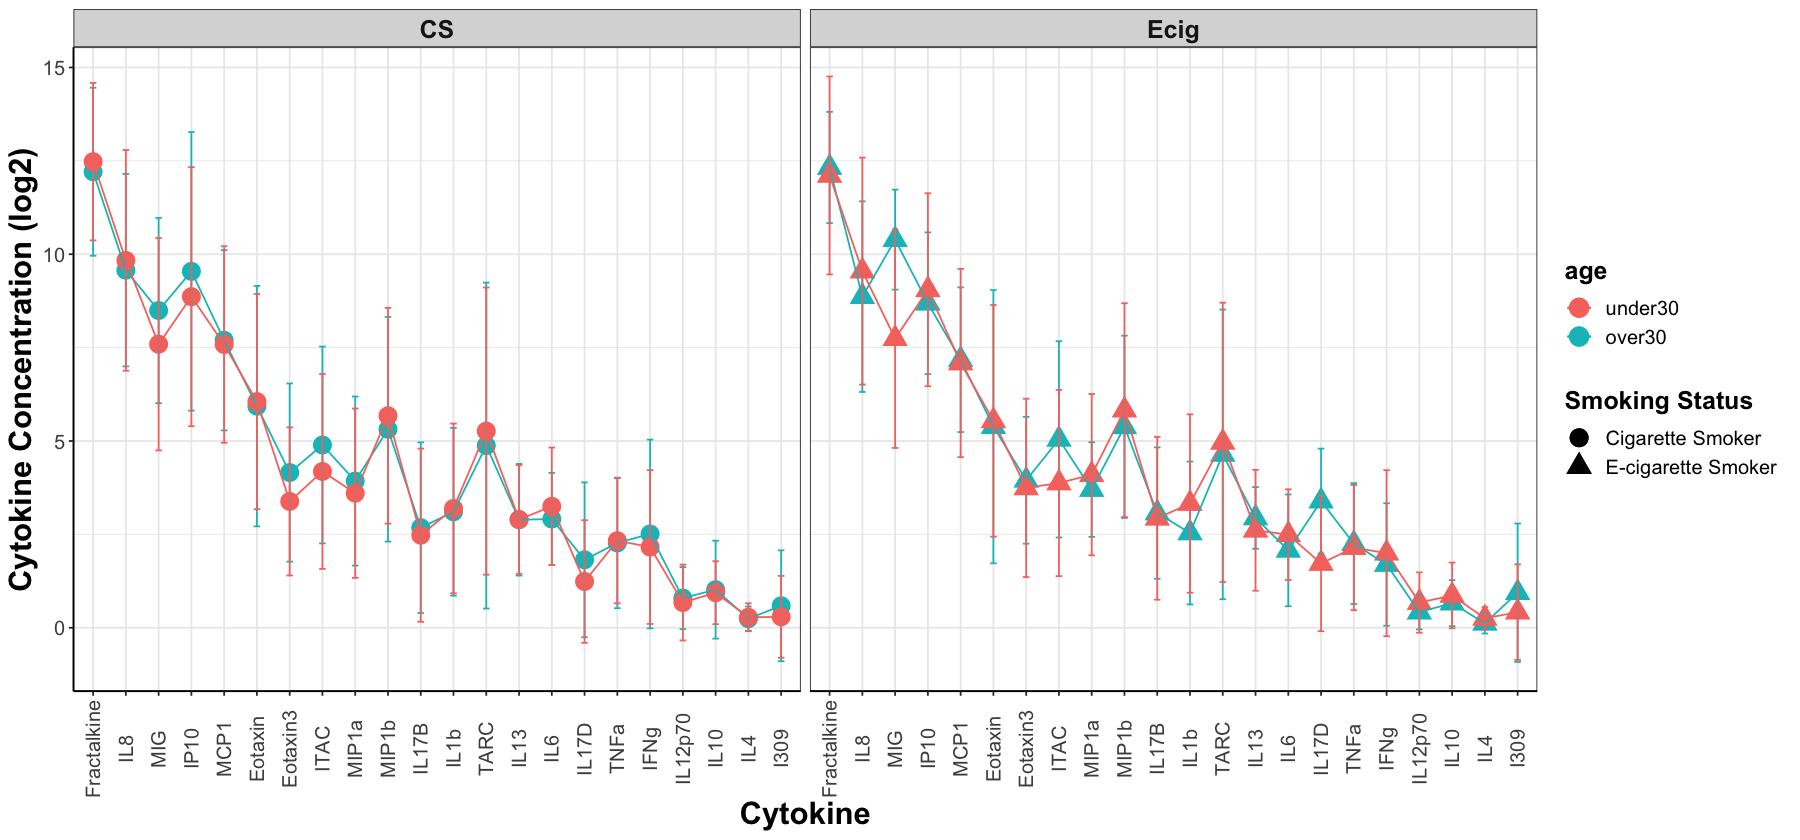

In [35]:
options(repr.plot.width=15, repr.plot.height=7) 
descending_cytokines = c('Fractalkine','IL8','MIG','IP10','MCP1','Eotaxin','Eotaxin3','ITAC','MIP1a','MIP1b','IL17B',
                         'IL1b','TARC','IL13','IL6','IL17D','TNFa','IFNg','IL12p70','IL10','IL4','I309')
cytokines = factor(over30_smokers_mean_sd_df$protein, levels = descending_cytokines)
ggplot() + 
  geom_point(data = over30_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, color = age), size = 5) + 
  geom_point(data = under30_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, color = age), size = 5) +
  geom_line(data = over30_smokers_mean_sd_df, aes(x = cytokines, y = mean, group = smoking_status, color = age)) + 
  geom_line(data = under30_smokers_mean_sd_df, aes(x = cytokines, y = mean, group = smoking_status, color = age)) +
  geom_errorbar(data = over30_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = age), width = .2,, position = position_dodge(.9)) +
  geom_errorbar(data = under30_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = age), width = .2, position = position_dodge(.9)) +
  facet_wrap(~smoking_status) + 
  theme_bw() + 

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes under30
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_colour_discrete(name  ="age",
                            #breaks=c("under30", "over30"),
                            labels=c("under30", "over30")) +
  scale_shape_discrete(name  ="Smoking Status",
                           #breaks=c("under30", "over30"),
                           labels=c("Cigarette Smoker", "E-cigarette Smoker"))

In [36]:
#under30 vs. over30 CS
Eotaxin_age_CS = wilcox.test(under30_Eotaxin_CS$Conc_pslog2, over30_Eotaxin_CS$Conc_pslog2)
Eotaxin3_age_CS = wilcox.test(under30_Eotaxin3_CS$Conc_pslog2, over30_Eotaxin3_CS$Conc_pslog2)
Fractalkine_age_CS = wilcox.test(under30_Fractalkine_CS$Conc_pslog2, over30_Fractalkine_CS$Conc_pslog2)
I309_age_CS = wilcox.test(under30_I309_CS$Conc_pslog2, over30_I309_CS$Conc_pslog2)
IFNg_age_CS = wilcox.test(under30_IFNg_CS$Conc_pslog2, over30_IFNg_CS$Conc_pslog2)
IL10_age_CS = wilcox.test(under30_IL10_CS$Conc_pslog2, over30_IL10_CS$Conc_pslog2)
IL12p70_age_CS = wilcox.test(under30_IL12p70_CS$Conc_pslog2, over30_IL12p70_CS$Conc_pslog2)
IL13_age_CS = wilcox.test(under30_IL13_CS$Conc_pslog2, over30_IL13_CS$Conc_pslog2)
IL17B_age_CS = wilcox.test(under30_IL17B_CS$Conc_pslog2, over30_IL17B_CS$Conc_pslog2)
IL17D_age_CS = wilcox.test(under30_IL17D_CS$Conc_pslog2, over30_IL17D_CS$Conc_pslog2)
IL1b_age_CS = wilcox.test(under30_IL1b_CS$Conc_pslog2, over30_IL1b_CS$Conc_pslog2)
IL4_age_CS = wilcox.test(under30_IL4_CS$Conc_pslog2, over30_IL4_CS$Conc_pslog2)
IL6_age_CS = wilcox.test(under30_IL6_CS$Conc_pslog2, over30_IL6_CS$Conc_pslog2)
IL8_age_CS = wilcox.test(under30_IL8_CS$Conc_pslog2, over30_IL8_CS$Conc_pslog2)
IP10_age_CS = wilcox.test(under30_IP10_CS$Conc_pslog2, over30_IP10_CS$Conc_pslog2)
ITAC_age_CS = wilcox.test(under30_ITAC_CS$Conc_pslog2, over30_ITAC_CS$Conc_pslog2)
MCP1_age_CS = wilcox.test(under30_MCP1_CS$Conc_pslog2, over30_MCP1_CS$Conc_pslog2)
MIG_age_CS = wilcox.test(under30_MIG_CS$Conc_pslog2, over30_MIG_CS$Conc_pslog2)
MIP1a_age_CS = wilcox.test(under30_MIP1a_CS$Conc_pslog2, over30_MIP1a_CS$Conc_pslog2)
MIP1b_age_CS = wilcox.test(under30_MIP1b_CS$Conc_pslog2, over30_MIP1b_CS$Conc_pslog2)
TARC_age_CS = wilcox.test(under30_TARC_CS$Conc_pslog2, over30_TARC_CS$Conc_pslog2)
TNFa_age_CS = wilcox.test(under30_TNFa_CS$Conc_pslog2, over30_TNFa_CS$Conc_pslog2)

#under30 vs. over30 Ecig
Eotaxin_age_Ecig = wilcox.test(under30_Eotaxin_Ecig$Conc_pslog2, over30_Eotaxin_Ecig$Conc_pslog2)
Eotaxin3_age_Ecig = wilcox.test(under30_Eotaxin3_Ecig$Conc_pslog2, over30_Eotaxin3_Ecig$Conc_pslog2)
Fractalkine_age_Ecig = wilcox.test(under30_Fractalkine_Ecig$Conc_pslog2, over30_Fractalkine_Ecig$Conc_pslog2)
I309_age_Ecig = wilcox.test(under30_I309_Ecig$Conc_pslog2, over30_I309_Ecig$Conc_pslog2)
IFNg_age_Ecig = wilcox.test(under30_IFNg_Ecig$Conc_pslog2, over30_IFNg_Ecig$Conc_pslog2)
IL10_age_Ecig = wilcox.test(under30_IL10_Ecig$Conc_pslog2, over30_IL10_Ecig$Conc_pslog2)
IL12p70_age_Ecig = wilcox.test(under30_IL12p70_Ecig$Conc_pslog2, over30_IL12p70_Ecig$Conc_pslog2)
IL13_age_Ecig = wilcox.test(under30_IL13_Ecig$Conc_pslog2, over30_IL13_Ecig$Conc_pslog2)
IL17B_age_Ecig = wilcox.test(under30_IL17B_Ecig$Conc_pslog2, over30_IL17B_Ecig$Conc_pslog2)
IL17D_age_Ecig = wilcox.test(under30_IL17D_Ecig$Conc_pslog2, over30_IL17D_Ecig$Conc_pslog2)
IL1b_age_Ecig = wilcox.test(under30_IL1b_Ecig$Conc_pslog2, over30_IL1b_Ecig$Conc_pslog2)
IL4_age_Ecig = wilcox.test(under30_IL4_Ecig$Conc_pslog2, over30_IL4_Ecig$Conc_pslog2)
IL6_age_Ecig = wilcox.test(under30_IL6_Ecig$Conc_pslog2, over30_IL6_Ecig$Conc_pslog2)
IL8_age_Ecig = wilcox.test(under30_IL8_Ecig$Conc_pslog2, over30_IL8_Ecig$Conc_pslog2)
IP10_age_Ecig = wilcox.test(under30_IP10_Ecig$Conc_pslog2, over30_IP10_Ecig$Conc_pslog2)
ITAC_age_Ecig = wilcox.test(under30_ITAC_Ecig$Conc_pslog2, over30_ITAC_Ecig$Conc_pslog2)
MCP1_age_Ecig = wilcox.test(under30_MCP1_Ecig$Conc_pslog2, over30_MCP1_Ecig$Conc_pslog2)
MIG_age_Ecig = wilcox.test(under30_MIG_Ecig$Conc_pslog2, over30_MIG_Ecig$Conc_pslog2)
MIP1a_age_Ecig = wilcox.test(under30_MIP1a_Ecig$Conc_pslog2, over30_MIP1a_Ecig$Conc_pslog2)
MIP1b_age_Ecig = wilcox.test(under30_MIP1b_Ecig$Conc_pslog2, over30_MIP1b_Ecig$Conc_pslog2)
TARC_age_Ecig = wilcox.test(under30_TARC_Ecig$Conc_pslog2, over30_TARC_Ecig$Conc_pslog2)
TNFa_age_Ecig = wilcox.test(under30_TNFa_Ecig$Conc_pslog2, over30_TNFa_Ecig$Conc_pslog2)

Warning message in wilcox.test.default(under30_Eotaxin_CS$Conc_pslog2, over30_Eotaxin_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(under30_Eotaxin3_CS$Conc_pslog2, over30_Eotaxin3_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(under30_I309_CS$Conc_pslog2, over30_I309_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(under30_IFNg_CS$Conc_pslog2, over30_IFNg_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(under30_IL10_CS$Conc_pslog2, over30_IL10_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(under30_IL12p70_CS$Conc_pslog2, over30_IL12p70_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(under30_IL13_CS$Conc_pslog2, over30_IL13_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning messag

In [37]:
#under30 vs. over30 CS
Eotaxin_CS_tuple = get_stat_pvalue_tuple(Eotaxin_age_CS)
Eotaxin3_CS_tuple = get_stat_pvalue_tuple(Eotaxin3_age_CS)
Fractalkine_CS_tuple = get_stat_pvalue_tuple(Fractalkine_age_CS)
I309_CS_tuple = get_stat_pvalue_tuple(I309_age_CS)
IFNg_CS_tuple = get_stat_pvalue_tuple(IFNg_age_CS)
IL10_CS_tuple = get_stat_pvalue_tuple(IL10_age_CS)
IL12p70_CS_tuple = get_stat_pvalue_tuple(IL12p70_age_CS)
IL13_CS_tuple = get_stat_pvalue_tuple(IL13_age_CS)
IL17B_CS_tuple = get_stat_pvalue_tuple(IL17B_age_CS)
IL17D_CS_tuple = get_stat_pvalue_tuple(IL17D_age_CS)
IL1b_CS_tuple = get_stat_pvalue_tuple(IL1b_age_CS)
IL4_CS_tuple = get_stat_pvalue_tuple(IL4_age_CS)
IL6_CS_tuple = get_stat_pvalue_tuple(IL6_age_CS)
IL8_CS_tuple = get_stat_pvalue_tuple(IL8_age_CS)
IP10_CS_tuple = get_stat_pvalue_tuple(IP10_age_CS)
ITAC_CS_tuple = get_stat_pvalue_tuple(ITAC_age_CS)
MCP1_CS_tuple = get_stat_pvalue_tuple(MCP1_age_CS)
MIG_CS_tuple = get_stat_pvalue_tuple(MIG_age_CS)
MIP1a_CS_tuple = get_stat_pvalue_tuple(MIP1a_age_CS)
MIP1b_CS_tuple = get_stat_pvalue_tuple(MIP1b_age_CS)
TARC_CS_tuple = get_stat_pvalue_tuple(TARC_age_CS)
TNFa_CS_tuple = get_stat_pvalue_tuple(TNFa_age_CS)

#under30 vs. over30 Ecig
Eotaxin_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin_age_Ecig)
Eotaxin3_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin3_age_Ecig)
Fractalkine_Ecig_tuple = get_stat_pvalue_tuple(Fractalkine_age_Ecig)
I309_Ecig_tuple = get_stat_pvalue_tuple(I309_age_Ecig)
IFNg_Ecig_tuple = get_stat_pvalue_tuple(IFNg_age_Ecig)
IL10_Ecig_tuple = get_stat_pvalue_tuple(IL10_age_Ecig)
IL12p70_Ecig_tuple = get_stat_pvalue_tuple(IL12p70_age_Ecig)
IL13_Ecig_tuple = get_stat_pvalue_tuple(IL13_age_Ecig)
IL17B_Ecig_tuple = get_stat_pvalue_tuple(IL17B_age_Ecig)
IL17D_Ecig_tuple = get_stat_pvalue_tuple(IL17D_age_Ecig)
IL1b_Ecig_tuple = get_stat_pvalue_tuple(IL1b_age_Ecig)
IL4_Ecig_tuple = get_stat_pvalue_tuple(IL4_age_Ecig)
IL6_Ecig_tuple = get_stat_pvalue_tuple(IL6_age_Ecig)
IL8_Ecig_tuple = get_stat_pvalue_tuple(IL8_age_Ecig)
IP10_Ecig_tuple = get_stat_pvalue_tuple(IP10_age_Ecig)
ITAC_Ecig_tuple = get_stat_pvalue_tuple(ITAC_age_Ecig)
MCP1_Ecig_tuple = get_stat_pvalue_tuple(MCP1_age_Ecig)
MIG_Ecig_tuple = get_stat_pvalue_tuple(MIG_age_Ecig)
MIP1a_Ecig_tuple = get_stat_pvalue_tuple(MIP1a_age_Ecig)
MIP1b_Ecig_tuple = get_stat_pvalue_tuple(MIP1b_age_Ecig)
TARC_Ecig_tuple = get_stat_pvalue_tuple(TARC_age_Ecig)
TNFa_Ecig_tuple = get_stat_pvalue_tuple(TNFa_age_Ecig)

In [38]:
age_CS_table = table_summary(Eotaxin_CS_tuple, Eotaxin3_CS_tuple, Fractalkine_CS_tuple,I309_CS_tuple,
                            IFNg_CS_tuple, IL10_CS_tuple, IL12p70_CS_tuple, IL13_CS_tuple, 
                            IL17B_CS_tuple, IL17D_CS_tuple, IL1b_CS_tuple, IL4_CS_tuple, IL6_CS_tuple,
                            IL8_CS_tuple, IP10_CS_tuple, ITAC_CS_tuple, MCP1_CS_tuple, MIG_CS_tuple,
                            MIP1a_CS_tuple, MIP1b_CS_tuple, TARC_CS_tuple, TNFa_CS_tuple)
age_Ecig_table = table_summary(Eotaxin_Ecig_tuple, Eotaxin3_Ecig_tuple, Fractalkine_Ecig_tuple,I309_Ecig_tuple,
                            IFNg_Ecig_tuple, IL10_Ecig_tuple, IL12p70_Ecig_tuple, IL13_Ecig_tuple, 
                            IL17B_Ecig_tuple, IL17D_Ecig_tuple, IL1b_Ecig_tuple, IL4_Ecig_tuple, IL6_Ecig_tuple,
                            IL8_Ecig_tuple, IP10_Ecig_tuple, ITAC_Ecig_tuple, MCP1_Ecig_tuple, MIG_Ecig_tuple,
                            MIP1a_Ecig_tuple, MIP1b_Ecig_tuple, TARC_Ecig_tuple, TNFa_Ecig_tuple)
age_table = cbind(age_CS_table, age_Ecig_table)
age_table

,Statistic,p value,Statistic,p value
Eotaxin,341.0,0.9341415,346.0,0.8784677161
Eotaxin3,280.0,0.3081224,317.0,0.7659219711
Fractalkine,359.0,0.6821245,316.0,0.7537480592
I309,305.0,0.3129434,292.5,0.2614944697
IFNg,312.0,0.6647271,342.0,0.9284385872
IL10,350.5,0.7971872,338.0,0.9807482322
IL12p70,284.0,0.3397551,329.0,0.9158017034
IL13,338.0,0.9780296,293.0,0.4939248063
IL17B,312.0,0.6595286,332.0,0.9547447230
IL17D,298.5,0.4878991,124.0,0.0006453360


# BMI

Splitting into categories: Normal (18.5-25), overweight or obese(>=25).

In [39]:
get_normalbmi_subset = function(dataframe, protein, smoking_status){
    #"""
    # Getting concentrations for normal bmi subjects for each cytokine based on smoking status (ciagratte or 
    # e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$BMI < 25 & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

normalbmi_Eotaxin_CS = get_normalbmi_subset(data_df,'Eotaxin','CS')
normalbmi_Eotaxin3_CS = get_normalbmi_subset(data_df,'Eotaxin3','CS')
normalbmi_Fractalkine_CS = get_normalbmi_subset(data_df,'Fractalkine','CS')
normalbmi_I309_CS = get_normalbmi_subset(data_df,'I309','CS')
normalbmi_IFNg_CS = get_normalbmi_subset(data_df,'IFNg','CS')
normalbmi_IL10_CS = get_normalbmi_subset(data_df,'IL10','CS')
normalbmi_IL12p70_CS = get_normalbmi_subset(data_df,'IL12p70','CS')
normalbmi_IL13_CS = get_normalbmi_subset(data_df,'IL13','CS')
normalbmi_IL17B_CS = get_normalbmi_subset(data_df,'IL17B','CS')
normalbmi_IL17D_CS = get_normalbmi_subset(data_df,'IL17D','CS')
normalbmi_IL1b_CS = get_normalbmi_subset(data_df,'IL1b','CS')
normalbmi_IL4_CS = get_normalbmi_subset(data_df,'IL4','CS')
normalbmi_IL6_CS = get_normalbmi_subset(data_df,'IL6','CS')
normalbmi_IL8_CS = get_normalbmi_subset(data_df,'IL8','CS')
normalbmi_IP10_CS = get_normalbmi_subset(data_df,'IP10','CS')
normalbmi_ITAC_CS = get_normalbmi_subset(data_df,'ITAC','CS')
normalbmi_MCP1_CS = get_normalbmi_subset(data_df,'MCP1','CS')
normalbmi_MIG_CS = get_normalbmi_subset(data_df,'MIG','CS')
normalbmi_MIP1a_CS = get_normalbmi_subset(data_df,'MIP1a','CS')
normalbmi_MIP1b_CS = get_normalbmi_subset(data_df,'MIP1b','CS')
normalbmi_TARC_CS = get_normalbmi_subset(data_df,'TARC','CS')
normalbmi_TNFa_CS = get_normalbmi_subset(data_df,'TNFa','CS')
normalbmi_Eotaxin_Ecig = get_normalbmi_subset(data_df,'Eotaxin','Ecig')
normalbmi_Eotaxin3_Ecig = get_normalbmi_subset(data_df,'Eotaxin3','Ecig')
normalbmi_Fractalkine_Ecig = get_normalbmi_subset(data_df,'Fractalkine','Ecig')
normalbmi_I309_Ecig = get_normalbmi_subset(data_df,'I309','Ecig')
normalbmi_IFNg_Ecig = get_normalbmi_subset(data_df,'IFNg','Ecig')
normalbmi_IL10_Ecig = get_normalbmi_subset(data_df,'IL10','Ecig')
normalbmi_IL12p70_Ecig = get_normalbmi_subset(data_df,'IL12p70','Ecig')
normalbmi_IL13_Ecig = get_normalbmi_subset(data_df,'IL13','Ecig')
normalbmi_IL17B_Ecig = get_normalbmi_subset(data_df,'IL17B','Ecig')
normalbmi_IL17D_Ecig = get_normalbmi_subset(data_df,'IL17D','Ecig')
normalbmi_IL1b_Ecig = get_normalbmi_subset(data_df,'IL1b','Ecig')
normalbmi_IL4_Ecig = get_normalbmi_subset(data_df,'IL4','Ecig')
normalbmi_IL6_Ecig = get_normalbmi_subset(data_df,'IL6','Ecig')
normalbmi_IL8_Ecig = get_normalbmi_subset(data_df,'IL8','Ecig')
normalbmi_IP10_Ecig = get_normalbmi_subset(data_df,'IP10','Ecig')
normalbmi_ITAC_Ecig = get_normalbmi_subset(data_df,'ITAC','Ecig')
normalbmi_MCP1_Ecig = get_normalbmi_subset(data_df,'MCP1','Ecig')
normalbmi_MIG_Ecig = get_normalbmi_subset(data_df,'MIG','Ecig')
normalbmi_MIP1a_Ecig = get_normalbmi_subset(data_df,'MIP1a','Ecig')
normalbmi_MIP1b_Ecig = get_normalbmi_subset(data_df,'MIP1b','Ecig')
normalbmi_TARC_Ecig = get_normalbmi_subset(data_df,'TARC','Ecig')
normalbmi_TNFa_Ecig = get_normalbmi_subset(data_df,'TNFa','Ecig')

In [40]:
get_overweightbmi_subset = function(dataframe, protein, smoking_status){
    #"""
    # Getting concentrations for overweight bmi subjects for each cytokine based on smoking status (ciagratte or 
    # e-cig user).
    
    #:param: subsetted data frame, race specification, cytokine, smoking status 
    #:output: a 24x13 matrix containing concentrations for each cytokine

    #"""
    subsetted_df = subset(dataframe, dataframe$BMI >= 25 & dataframe$Protein == protein & dataframe$Group == smoking_status)
}

overweightbmi_Eotaxin_CS = get_overweightbmi_subset(data_df,'Eotaxin','CS')
overweightbmi_Eotaxin3_CS = get_overweightbmi_subset(data_df,'Eotaxin3','CS')
overweightbmi_Fractalkine_CS = get_overweightbmi_subset(data_df,'Fractalkine','CS')
overweightbmi_I309_CS = get_overweightbmi_subset(data_df,'I309','CS')
overweightbmi_IFNg_CS = get_overweightbmi_subset(data_df,'IFNg','CS')
overweightbmi_IL10_CS = get_overweightbmi_subset(data_df,'IL10','CS')
overweightbmi_IL12p70_CS = get_overweightbmi_subset(data_df,'IL12p70','CS')
overweightbmi_IL13_CS = get_overweightbmi_subset(data_df,'IL13','CS')
overweightbmi_IL17B_CS = get_overweightbmi_subset(data_df,'IL17B','CS')
overweightbmi_IL17D_CS = get_overweightbmi_subset(data_df,'IL17D','CS')
overweightbmi_IL1b_CS = get_overweightbmi_subset(data_df,'IL1b','CS')
overweightbmi_IL4_CS = get_overweightbmi_subset(data_df,'IL4','CS')
overweightbmi_IL6_CS = get_overweightbmi_subset(data_df,'IL6','CS')
overweightbmi_IL8_CS = get_overweightbmi_subset(data_df,'IL8','CS')
overweightbmi_IP10_CS = get_overweightbmi_subset(data_df,'IP10','CS')
overweightbmi_ITAC_CS = get_overweightbmi_subset(data_df,'ITAC','CS')
overweightbmi_MCP1_CS = get_overweightbmi_subset(data_df,'MCP1','CS')
overweightbmi_MIG_CS = get_overweightbmi_subset(data_df,'MIG','CS')
overweightbmi_MIP1a_CS = get_overweightbmi_subset(data_df,'MIP1a','CS')
overweightbmi_MIP1b_CS = get_overweightbmi_subset(data_df,'MIP1b','CS')
overweightbmi_TARC_CS = get_overweightbmi_subset(data_df,'TARC','CS')
overweightbmi_TNFa_CS = get_overweightbmi_subset(data_df,'TNFa','CS')
overweightbmi_Eotaxin_Ecig = get_overweightbmi_subset(data_df,'Eotaxin','Ecig')
overweightbmi_Eotaxin3_Ecig = get_overweightbmi_subset(data_df,'Eotaxin3','Ecig')
overweightbmi_Fractalkine_Ecig = get_overweightbmi_subset(data_df,'Fractalkine','Ecig')
overweightbmi_I309_Ecig = get_overweightbmi_subset(data_df,'I309','Ecig')
overweightbmi_IFNg_Ecig = get_overweightbmi_subset(data_df,'IFNg','Ecig')
overweightbmi_IL10_Ecig = get_overweightbmi_subset(data_df,'IL10','Ecig')
overweightbmi_IL12p70_Ecig = get_overweightbmi_subset(data_df,'IL12p70','Ecig')
overweightbmi_IL13_Ecig = get_overweightbmi_subset(data_df,'IL13','Ecig')
overweightbmi_IL17B_Ecig = get_overweightbmi_subset(data_df,'IL17B','Ecig')
overweightbmi_IL17D_Ecig = get_overweightbmi_subset(data_df,'IL17D','Ecig')
overweightbmi_IL1b_Ecig = get_overweightbmi_subset(data_df,'IL1b','Ecig')
overweightbmi_IL4_Ecig = get_overweightbmi_subset(data_df,'IL4','Ecig')
overweightbmi_IL6_Ecig = get_overweightbmi_subset(data_df,'IL6','Ecig')
overweightbmi_IL8_Ecig = get_overweightbmi_subset(data_df,'IL8','Ecig')
overweightbmi_IP10_Ecig = get_overweightbmi_subset(data_df,'IP10','Ecig')
overweightbmi_ITAC_Ecig = get_overweightbmi_subset(data_df,'ITAC','Ecig')
overweightbmi_MCP1_Ecig = get_overweightbmi_subset(data_df,'MCP1','Ecig')
overweightbmi_MIG_Ecig = get_overweightbmi_subset(data_df,'MIG','Ecig')
overweightbmi_MIP1a_Ecig = get_overweightbmi_subset(data_df,'MIP1a','Ecig')
overweightbmi_MIP1b_Ecig = get_overweightbmi_subset(data_df,'MIP1b','Ecig')
overweightbmi_TARC_Ecig = get_overweightbmi_subset(data_df,'TARC','Ecig')
overweightbmi_TNFa_Ecig = get_overweightbmi_subset(data_df,'TNFa','Ecig')

In [41]:
get_bmi_mean_sd = function(df_subset, bmi, protein, smoking_status){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (mean and sd)

    #"""
    mean = mean(df_subset$Conc_pslog2)
    standard_deviation = sd(df_subset$Conc_pslog2)
    mean_sd_matrix = cbind(mean, standard_deviation, bmi, protein, smoking_status) 
    return(mean_sd_matrix)
}
#normalbmi subjects
normalbmi_smokers_mean_sd_df = data.frame(rbind(get_bmi_mean_sd(normalbmi_Eotaxin_CS, '24','Eotaxin','CS'),get_bmi_mean_sd(normalbmi_Eotaxin3_CS, '24','Eotaxin3','CS'),
                                 get_bmi_mean_sd(normalbmi_Fractalkine_CS, '24','Fractalkine','CS'),get_bmi_mean_sd(normalbmi_I309_CS, '24','I309','CS'), 
                                 get_bmi_mean_sd(normalbmi_IFNg_CS, '24','IFNg','CS'),get_bmi_mean_sd(normalbmi_IL10_CS, '24','IL10','CS'),
                                 get_bmi_mean_sd(normalbmi_IL12p70_CS, '24','IL12p70','CS'),get_bmi_mean_sd(normalbmi_IL13_CS, '24','IL13','CS'),
                                 get_bmi_mean_sd(normalbmi_IL17B_CS, '24','IL17B','CS'),get_bmi_mean_sd(normalbmi_IL17D_CS, '24','IL17D','CS'), 
                                 get_bmi_mean_sd(normalbmi_IL1b_CS, '24','IL1b','CS'),get_bmi_mean_sd(normalbmi_IL4_CS, '24','IL4','CS'),
                                 get_bmi_mean_sd(normalbmi_IL6_CS, '24','IL6','CS'),get_bmi_mean_sd(normalbmi_IL8_CS, '24','IL8','CS'),
                                 get_bmi_mean_sd(normalbmi_IP10_CS, '24','IP10','CS'),get_bmi_mean_sd(normalbmi_ITAC_CS, '24','ITAC','CS'),
                                 get_bmi_mean_sd(normalbmi_MCP1_CS, '24','MCP1','CS'),get_bmi_mean_sd(normalbmi_MIG_CS, '24','MIG','CS'),
                                 get_bmi_mean_sd(normalbmi_MIP1a_CS, '24','MIP1a','CS'),get_bmi_mean_sd(normalbmi_MIP1b_CS, '24','MIP1b','CS'),
                                 get_bmi_mean_sd(normalbmi_TARC_CS, '24','TARC','CS'),get_bmi_mean_sd(normalbmi_TNFa_CS, '24','TNFa','CS'),
                                 get_bmi_mean_sd(normalbmi_Eotaxin_Ecig, '24','Eotaxin','Ecig'),get_bmi_mean_sd(normalbmi_Eotaxin3_Ecig, '24','Eotaxin3','Ecig'),
                                 get_bmi_mean_sd(normalbmi_Fractalkine_Ecig, '24','Fractalkine','Ecig'),get_bmi_mean_sd(normalbmi_I309_Ecig, '24','I309','Ecig'),
                                 get_bmi_mean_sd(normalbmi_IFNg_Ecig, '24','IFNg','Ecig'),get_bmi_mean_sd(normalbmi_IL10_Ecig, '24','IL10','Ecig'),
                                 get_bmi_mean_sd(normalbmi_IL12p70_Ecig, '24','IL12p70','Ecig'),get_bmi_mean_sd(normalbmi_IL13_Ecig, '24','IL13','Ecig'),
                                 get_bmi_mean_sd(normalbmi_IL17B_Ecig, '24','IL17B','Ecig'),get_bmi_mean_sd(normalbmi_IL17D_Ecig, '24','IL17D','Ecig'),
                                 get_bmi_mean_sd(normalbmi_IL1b_Ecig, '24','IL1b','Ecig'),get_bmi_mean_sd(normalbmi_IL4_Ecig, '24','IL4','Ecig'),
                                 get_bmi_mean_sd(normalbmi_IL6_Ecig, '24','IL6','Ecig'),get_bmi_mean_sd(normalbmi_IL8_Ecig, '24','IL8','Ecig'),
                                 get_bmi_mean_sd(normalbmi_IP10_Ecig, '24','IP10','Ecig'),get_bmi_mean_sd(normalbmi_ITAC_Ecig, '24','ITAC','Ecig'),
                                 get_bmi_mean_sd(normalbmi_MCP1_Ecig, '24','MCP1','Ecig'),get_bmi_mean_sd(normalbmi_MIG_Ecig, '24','MIG','Ecig'),
                                 get_bmi_mean_sd(normalbmi_MIP1a_Ecig, '24','MIP1a','Ecig'),get_bmi_mean_sd(normalbmi_MIP1b_Ecig, '24','MIP1b','Ecig'),
                                 get_bmi_mean_sd(normalbmi_TARC_Ecig, '24','TARC','Ecig'),get_bmi_mean_sd(normalbmi_TNFa_Ecig, '24','TNFa','Ecig')))

#overweightbmi subjects
overweightbmi_smokers_mean_sd_df = data.frame(rbind(get_bmi_mean_sd(overweightbmi_Eotaxin_CS, '25','Eotaxin','CS'),get_bmi_mean_sd(overweightbmi_Eotaxin3_CS, '25','Eotaxin3','CS'),
                                 get_bmi_mean_sd(overweightbmi_Fractalkine_CS, '25','Fractalkine','CS'),get_bmi_mean_sd(overweightbmi_I309_CS, '25','I309','CS'), 
                                 get_bmi_mean_sd(overweightbmi_IFNg_CS, '25','IFNg','CS'),get_bmi_mean_sd(overweightbmi_IL10_CS, '25','IL10','CS'),
                                 get_bmi_mean_sd(overweightbmi_IL12p70_CS, '25','IL12p70','CS'),get_bmi_mean_sd(overweightbmi_IL13_CS, '25','IL13','CS'),
                                 get_bmi_mean_sd(overweightbmi_IL17B_CS, '25','IL17B','CS'),get_bmi_mean_sd(overweightbmi_IL17D_CS, '25','IL17D','CS'), 
                                 get_bmi_mean_sd(overweightbmi_IL1b_CS, '25','IL1b','CS'),get_bmi_mean_sd(overweightbmi_IL4_CS, '25','IL4','CS'),
                                 get_bmi_mean_sd(overweightbmi_IL6_CS, '25','IL6','CS'),get_bmi_mean_sd(overweightbmi_IL8_CS, '25','IL8','CS'),
                                 get_bmi_mean_sd(overweightbmi_IP10_CS, '25','IP10','CS'),get_bmi_mean_sd(overweightbmi_ITAC_CS, '25','ITAC','CS'),
                                 get_bmi_mean_sd(overweightbmi_MCP1_CS, '25','MCP1','CS'),get_bmi_mean_sd(overweightbmi_MIG_CS, '25','MIG','CS'),
                                 get_bmi_mean_sd(overweightbmi_MIP1a_CS, '25','MIP1a','CS'),get_bmi_mean_sd(overweightbmi_MIP1b_CS, '25','MIP1b','CS'),
                                 get_bmi_mean_sd(overweightbmi_TARC_CS, '25','TARC','CS'),get_bmi_mean_sd(overweightbmi_TNFa_CS, '25','TNFa','CS'),
                                 get_bmi_mean_sd(overweightbmi_Eotaxin_Ecig, '25','Eotaxin','Ecig'),get_bmi_mean_sd(overweightbmi_Eotaxin3_Ecig, '25','Eotaxin3','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_Fractalkine_Ecig, '25','Fractalkine','Ecig'),get_bmi_mean_sd(overweightbmi_I309_Ecig, '25','I309','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_IFNg_Ecig, '25','IFNg','Ecig'),get_bmi_mean_sd(overweightbmi_IL10_Ecig, '25','IL10','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_IL12p70_Ecig, '25','IL12p70','Ecig'),get_bmi_mean_sd(overweightbmi_IL13_Ecig, '25','IL13','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_IL17B_Ecig, '25','IL17B','Ecig'),get_bmi_mean_sd(overweightbmi_IL17D_Ecig, '25','IL17D','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_IL1b_Ecig, '25','IL1b','Ecig'),get_bmi_mean_sd(overweightbmi_IL4_Ecig, '25','IL4','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_IL6_Ecig, '25','IL6','Ecig'),get_bmi_mean_sd(overweightbmi_IL8_Ecig, '25','IL8','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_IP10_Ecig, '25','IP10','Ecig'),get_bmi_mean_sd(overweightbmi_ITAC_Ecig, '25','ITAC','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_MCP1_Ecig, '25','MCP1','Ecig'),get_bmi_mean_sd(overweightbmi_MIG_Ecig, '25','MIG','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_MIP1a_Ecig, '25','MIP1a','Ecig'),get_bmi_mean_sd(overweightbmi_MIP1b_Ecig, '25','MIP1b','Ecig'),
                                 get_bmi_mean_sd(overweightbmi_TARC_Ecig, '25','TARC','Ecig'),get_bmi_mean_sd(overweightbmi_TNFa_Ecig, '25','TNFa','Ecig')))

overweightbmi_smokers_mean_sd_df$mean = as.numeric(overweightbmi_smokers_mean_sd_df$mean)
normalbmi_smokers_mean_sd_df$mean = as.numeric(normalbmi_smokers_mean_sd_df$mean)
overweightbmi_smokers_mean_sd_df$standard_deviation = as.numeric(overweightbmi_smokers_mean_sd_df$standard_deviation)
normalbmi_smokers_mean_sd_df$standard_deviation = as.numeric(normalbmi_smokers_mean_sd_df$standard_deviation)

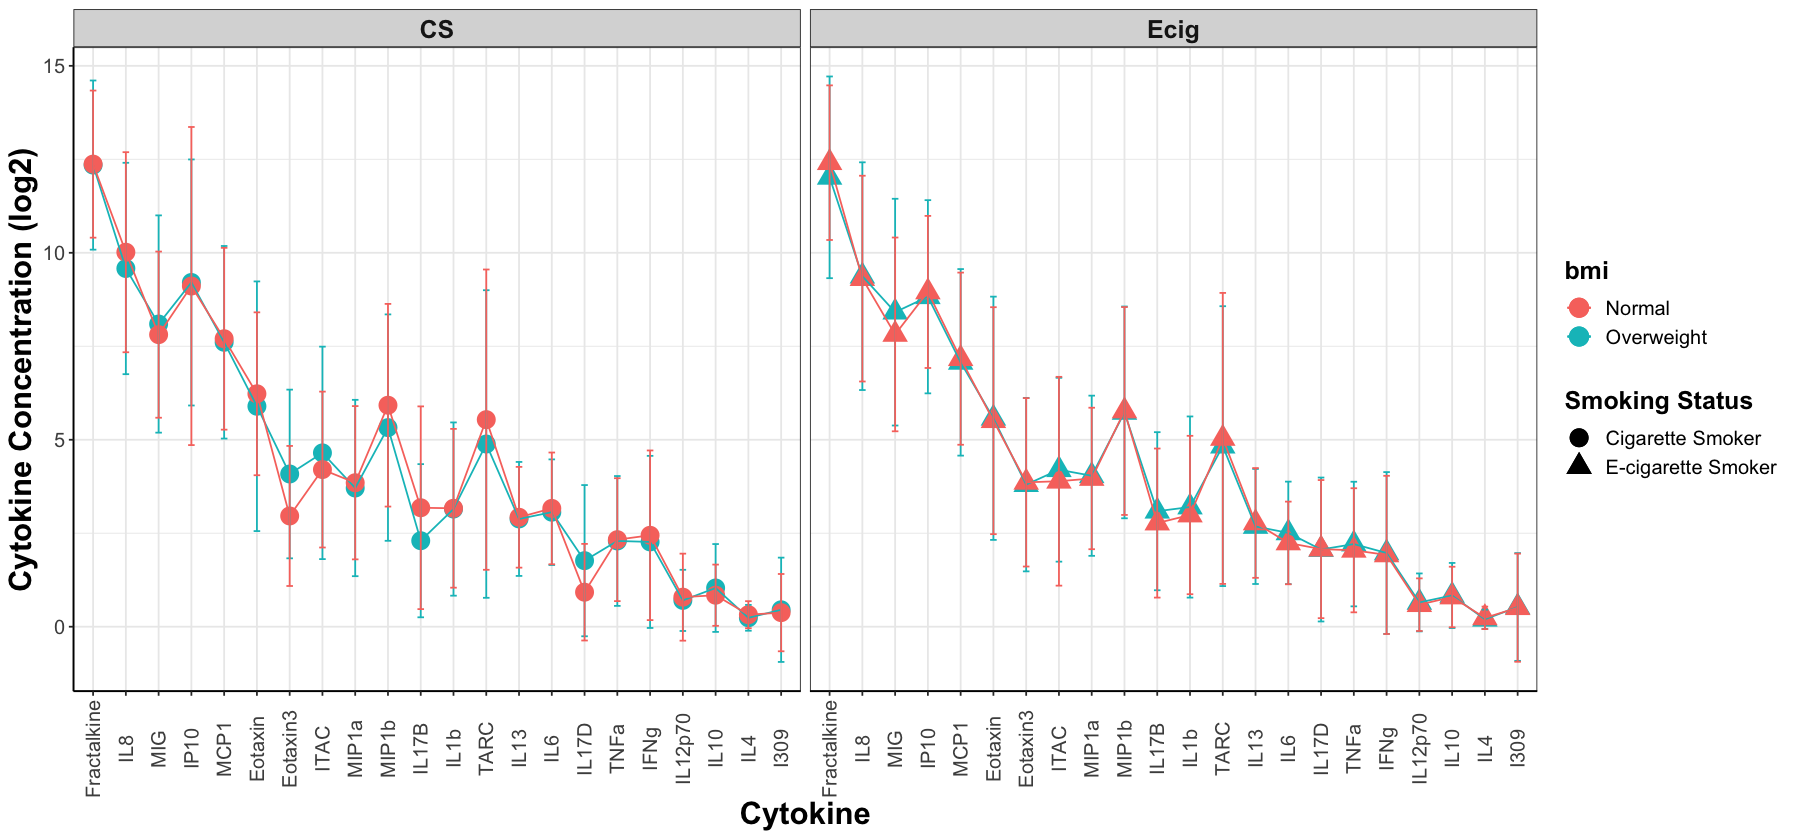

In [42]:
options(repr.plot.width=15, repr.plot.height=7) 
descending_cytokines = c('Fractalkine','IL8','MIG','IP10','MCP1','Eotaxin','Eotaxin3','ITAC','MIP1a','MIP1b','IL17B',
                         'IL1b','TARC','IL13','IL6','IL17D','TNFa','IFNg','IL12p70','IL10','IL4','I309')
cytokines = factor(overweightbmi_smokers_mean_sd_df$protein, levels = descending_cytokines)
ggplot() + 
  geom_point(data = overweightbmi_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, color = bmi), size = 5) + 
  geom_point(data = normalbmi_smokers_mean_sd_df, aes(x = cytokines, y = mean, shape = smoking_status, color = bmi), size = 5) +
  geom_line(data = overweightbmi_smokers_mean_sd_df, aes(x = cytokines, y = mean, group = smoking_status, color = bmi)) + 
  geom_line(data = normalbmi_smokers_mean_sd_df, aes(x = cytokines, y = mean, group = smoking_status, color = bmi)) +
  geom_errorbar(data = overweightbmi_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = bmi), width = .2,, position = position_dodge(.9)) +
  geom_errorbar(data = normalbmi_smokers_mean_sd_df, aes(y = mean, x = cytokines, ymin = mean - standard_deviation, ymax = mean + standard_deviation, 
                                                        color = bmi), width = .2, position = position_dodge(.9)) +
  facet_wrap(~smoking_status) + 
  theme_bw() + 

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes normalbmi
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_colour_discrete(name  ="bmi",
                            #breaks=c("normalbmi", "overweightbmi"),
                            labels=c("Normal", "Overweight")) +
  scale_shape_discrete(name  ="Smoking Status",
                           #breaks=c("normalbmi", "overweightbmi"),
                           labels=c("Cigarette Smoker", "E-cigarette Smoker"))

In [43]:
#normalbmi vs. overweightbmi CS
Eotaxin_bmi_CS = wilcox.test(normalbmi_Eotaxin_CS$Conc_pslog2, overweightbmi_Eotaxin_CS$Conc_pslog2)
Eotaxin3_bmi_CS = wilcox.test(normalbmi_Eotaxin3_CS$Conc_pslog2, overweightbmi_Eotaxin3_CS$Conc_pslog2)
Fractalkine_bmi_CS = wilcox.test(normalbmi_Fractalkine_CS$Conc_pslog2, overweightbmi_Fractalkine_CS$Conc_pslog2)
I309_bmi_CS = wilcox.test(normalbmi_I309_CS$Conc_pslog2, overweightbmi_I309_CS$Conc_pslog2)
IFNg_bmi_CS = wilcox.test(normalbmi_IFNg_CS$Conc_pslog2, overweightbmi_IFNg_CS$Conc_pslog2)
IL10_bmi_CS = wilcox.test(normalbmi_IL10_CS$Conc_pslog2, overweightbmi_IL10_CS$Conc_pslog2)
IL12p70_bmi_CS = wilcox.test(normalbmi_IL12p70_CS$Conc_pslog2, overweightbmi_IL12p70_CS$Conc_pslog2)
IL13_bmi_CS = wilcox.test(normalbmi_IL13_CS$Conc_pslog2, overweightbmi_IL13_CS$Conc_pslog2)
IL17B_bmi_CS = wilcox.test(normalbmi_IL17B_CS$Conc_pslog2, overweightbmi_IL17B_CS$Conc_pslog2)
IL17D_bmi_CS = wilcox.test(normalbmi_IL17D_CS$Conc_pslog2, overweightbmi_IL17D_CS$Conc_pslog2)
IL1b_bmi_CS = wilcox.test(normalbmi_IL1b_CS$Conc_pslog2, overweightbmi_IL1b_CS$Conc_pslog2)
IL4_bmi_CS = wilcox.test(normalbmi_IL4_CS$Conc_pslog2, overweightbmi_IL4_CS$Conc_pslog2)
IL6_bmi_CS = wilcox.test(normalbmi_IL6_CS$Conc_pslog2, overweightbmi_IL6_CS$Conc_pslog2)
IL8_bmi_CS = wilcox.test(normalbmi_IL8_CS$Conc_pslog2, overweightbmi_IL8_CS$Conc_pslog2)
IP10_bmi_CS = wilcox.test(normalbmi_IP10_CS$Conc_pslog2, overweightbmi_IP10_CS$Conc_pslog2)
ITAC_bmi_CS = wilcox.test(normalbmi_ITAC_CS$Conc_pslog2, overweightbmi_ITAC_CS$Conc_pslog2)
MCP1_bmi_CS = wilcox.test(normalbmi_MCP1_CS$Conc_pslog2, overweightbmi_MCP1_CS$Conc_pslog2)
MIG_bmi_CS = wilcox.test(normalbmi_MIG_CS$Conc_pslog2, overweightbmi_MIG_CS$Conc_pslog2)
MIP1a_bmi_CS = wilcox.test(normalbmi_MIP1a_CS$Conc_pslog2, overweightbmi_MIP1a_CS$Conc_pslog2)
MIP1b_bmi_CS = wilcox.test(normalbmi_MIP1b_CS$Conc_pslog2, overweightbmi_MIP1b_CS$Conc_pslog2)
TARC_bmi_CS = wilcox.test(normalbmi_TARC_CS$Conc_pslog2, overweightbmi_TARC_CS$Conc_pslog2)
TNFa_bmi_CS = wilcox.test(normalbmi_TNFa_CS$Conc_pslog2, overweightbmi_TNFa_CS$Conc_pslog2)

#normalbmi vs. overweightbmi Ecig
Eotaxin_bmi_Ecig = wilcox.test(normalbmi_Eotaxin_Ecig$Conc_pslog2, overweightbmi_Eotaxin_Ecig$Conc_pslog2)
Eotaxin3_bmi_Ecig = wilcox.test(normalbmi_Eotaxin3_Ecig$Conc_pslog2, overweightbmi_Eotaxin3_Ecig$Conc_pslog2)
Fractalkine_bmi_Ecig = wilcox.test(normalbmi_Fractalkine_Ecig$Conc_pslog2, overweightbmi_Fractalkine_Ecig$Conc_pslog2)
I309_bmi_Ecig = wilcox.test(normalbmi_I309_Ecig$Conc_pslog2, overweightbmi_I309_Ecig$Conc_pslog2)
IFNg_bmi_Ecig = wilcox.test(normalbmi_IFNg_Ecig$Conc_pslog2, overweightbmi_IFNg_Ecig$Conc_pslog2)
IL10_bmi_Ecig = wilcox.test(normalbmi_IL10_Ecig$Conc_pslog2, overweightbmi_IL10_Ecig$Conc_pslog2)
IL12p70_bmi_Ecig = wilcox.test(normalbmi_IL12p70_Ecig$Conc_pslog2, overweightbmi_IL12p70_Ecig$Conc_pslog2)
IL13_bmi_Ecig = wilcox.test(normalbmi_IL13_Ecig$Conc_pslog2, overweightbmi_IL13_Ecig$Conc_pslog2)
IL17B_bmi_Ecig = wilcox.test(normalbmi_IL17B_Ecig$Conc_pslog2, overweightbmi_IL17B_Ecig$Conc_pslog2)
IL17D_bmi_Ecig = wilcox.test(normalbmi_IL17D_Ecig$Conc_pslog2, overweightbmi_IL17D_Ecig$Conc_pslog2)
IL1b_bmi_Ecig = wilcox.test(normalbmi_IL1b_Ecig$Conc_pslog2, overweightbmi_IL1b_Ecig$Conc_pslog2)
IL4_bmi_Ecig = wilcox.test(normalbmi_IL4_Ecig$Conc_pslog2, overweightbmi_IL4_Ecig$Conc_pslog2)
IL6_bmi_Ecig = wilcox.test(normalbmi_IL6_Ecig$Conc_pslog2, overweightbmi_IL6_Ecig$Conc_pslog2)
IL8_bmi_Ecig = wilcox.test(normalbmi_IL8_Ecig$Conc_pslog2, overweightbmi_IL8_Ecig$Conc_pslog2)
IP10_bmi_Ecig = wilcox.test(normalbmi_IP10_Ecig$Conc_pslog2, overweightbmi_IP10_Ecig$Conc_pslog2)
ITAC_bmi_Ecig = wilcox.test(normalbmi_ITAC_Ecig$Conc_pslog2, overweightbmi_ITAC_Ecig$Conc_pslog2)
MCP1_bmi_Ecig = wilcox.test(normalbmi_MCP1_Ecig$Conc_pslog2, overweightbmi_MCP1_Ecig$Conc_pslog2)
MIG_bmi_Ecig = wilcox.test(normalbmi_MIG_Ecig$Conc_pslog2, overweightbmi_MIG_Ecig$Conc_pslog2)
MIP1a_bmi_Ecig = wilcox.test(normalbmi_MIP1a_Ecig$Conc_pslog2, overweightbmi_MIP1a_Ecig$Conc_pslog2)
MIP1b_bmi_Ecig = wilcox.test(normalbmi_MIP1b_Ecig$Conc_pslog2, overweightbmi_MIP1b_Ecig$Conc_pslog2)
TARC_bmi_Ecig = wilcox.test(normalbmi_TARC_Ecig$Conc_pslog2, overweightbmi_TARC_Ecig$Conc_pslog2)
TNFa_bmi_Ecig = wilcox.test(normalbmi_TNFa_Ecig$Conc_pslog2, overweightbmi_TNFa_Ecig$Conc_pslog2)

Warning message in wilcox.test.default(normalbmi_Eotaxin_CS$Conc_pslog2, overweightbmi_Eotaxin_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(normalbmi_Eotaxin3_CS$Conc_pslog2, overweightbmi_Eotaxin3_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(normalbmi_I309_CS$Conc_pslog2, overweightbmi_I309_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(normalbmi_IFNg_CS$Conc_pslog2, overweightbmi_IFNg_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(normalbmi_IL10_CS$Conc_pslog2, overweightbmi_IL10_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(normalbmi_IL12p70_CS$Conc_pslog2, overweightbmi_IL12p70_CS$Conc_pslog2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(normalbmi_IL13_CS$Conc_pslog2, overweightbmi_IL13_CS$Conc_p

In [44]:
#normalbmi vs. overweightbmi CS
Eotaxin_CS_tuple = get_stat_pvalue_tuple(Eotaxin_bmi_CS)
Eotaxin3_CS_tuple = get_stat_pvalue_tuple(Eotaxin3_bmi_CS)
Fractalkine_CS_tuple = get_stat_pvalue_tuple(Fractalkine_bmi_CS)
I309_CS_tuple = get_stat_pvalue_tuple(I309_bmi_CS)
IFNg_CS_tuple = get_stat_pvalue_tuple(IFNg_bmi_CS)
IL10_CS_tuple = get_stat_pvalue_tuple(IL10_bmi_CS)
IL12p70_CS_tuple = get_stat_pvalue_tuple(IL12p70_bmi_CS)
IL13_CS_tuple = get_stat_pvalue_tuple(IL13_bmi_CS)
IL17B_CS_tuple = get_stat_pvalue_tuple(IL17B_bmi_CS)
IL17D_CS_tuple = get_stat_pvalue_tuple(IL17D_bmi_CS)
IL1b_CS_tuple = get_stat_pvalue_tuple(IL1b_bmi_CS)
IL4_CS_tuple = get_stat_pvalue_tuple(IL4_bmi_CS)
IL6_CS_tuple = get_stat_pvalue_tuple(IL6_bmi_CS)
IL8_CS_tuple = get_stat_pvalue_tuple(IL8_bmi_CS)
IP10_CS_tuple = get_stat_pvalue_tuple(IP10_bmi_CS)
ITAC_CS_tuple = get_stat_pvalue_tuple(ITAC_bmi_CS)
MCP1_CS_tuple = get_stat_pvalue_tuple(MCP1_bmi_CS)
MIG_CS_tuple = get_stat_pvalue_tuple(MIG_bmi_CS)
MIP1a_CS_tuple = get_stat_pvalue_tuple(MIP1a_bmi_CS)
MIP1b_CS_tuple = get_stat_pvalue_tuple(MIP1b_bmi_CS)
TARC_CS_tuple = get_stat_pvalue_tuple(TARC_bmi_CS)
TNFa_CS_tuple = get_stat_pvalue_tuple(TNFa_bmi_CS)

#normalbmi vs. overweightbmi Ecig
Eotaxin_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin_bmi_Ecig)
Eotaxin3_Ecig_tuple = get_stat_pvalue_tuple(Eotaxin3_bmi_Ecig)
Fractalkine_Ecig_tuple = get_stat_pvalue_tuple(Fractalkine_bmi_Ecig)
I309_Ecig_tuple = get_stat_pvalue_tuple(I309_bmi_Ecig)
IFNg_Ecig_tuple = get_stat_pvalue_tuple(IFNg_bmi_Ecig)
IL10_Ecig_tuple = get_stat_pvalue_tuple(IL10_bmi_Ecig)
IL12p70_Ecig_tuple = get_stat_pvalue_tuple(IL12p70_bmi_Ecig)
IL13_Ecig_tuple = get_stat_pvalue_tuple(IL13_bmi_Ecig)
IL17B_Ecig_tuple = get_stat_pvalue_tuple(IL17B_bmi_Ecig)
IL17D_Ecig_tuple = get_stat_pvalue_tuple(IL17D_bmi_Ecig)
IL1b_Ecig_tuple = get_stat_pvalue_tuple(IL1b_bmi_Ecig)
IL4_Ecig_tuple = get_stat_pvalue_tuple(IL4_bmi_Ecig)
IL6_Ecig_tuple = get_stat_pvalue_tuple(IL6_bmi_Ecig)
IL8_Ecig_tuple = get_stat_pvalue_tuple(IL8_bmi_Ecig)
IP10_Ecig_tuple = get_stat_pvalue_tuple(IP10_bmi_Ecig)
ITAC_Ecig_tuple = get_stat_pvalue_tuple(ITAC_bmi_Ecig)
MCP1_Ecig_tuple = get_stat_pvalue_tuple(MCP1_bmi_Ecig)
MIG_Ecig_tuple = get_stat_pvalue_tuple(MIG_bmi_Ecig)
MIP1a_Ecig_tuple = get_stat_pvalue_tuple(MIP1a_bmi_Ecig)
MIP1b_Ecig_tuple = get_stat_pvalue_tuple(MIP1b_bmi_Ecig)
TARC_Ecig_tuple = get_stat_pvalue_tuple(TARC_bmi_Ecig)
TNFa_Ecig_tuple = get_stat_pvalue_tuple(TNFa_bmi_Ecig)

In [45]:
bmi_CS_table = table_summary(Eotaxin_CS_tuple, Eotaxin3_CS_tuple, Fractalkine_CS_tuple,I309_CS_tuple,
                            IFNg_CS_tuple, IL10_CS_tuple, IL12p70_CS_tuple, IL13_CS_tuple, 
                            IL17B_CS_tuple, IL17D_CS_tuple, IL1b_CS_tuple, IL4_CS_tuple, IL6_CS_tuple,
                            IL8_CS_tuple, IP10_CS_tuple, ITAC_CS_tuple, MCP1_CS_tuple, MIG_CS_tuple,
                            MIP1a_CS_tuple, MIP1b_CS_tuple, TARC_CS_tuple, TNFa_CS_tuple)
bmi_Ecig_table = table_summary(Eotaxin_Ecig_tuple, Eotaxin3_Ecig_tuple, Fractalkine_Ecig_tuple,I309_Ecig_tuple,
                            IFNg_Ecig_tuple, IL10_Ecig_tuple, IL12p70_Ecig_tuple, IL13_Ecig_tuple, 
                            IL17B_Ecig_tuple, IL17D_Ecig_tuple, IL1b_Ecig_tuple, IL4_Ecig_tuple, IL6_Ecig_tuple,
                            IL8_Ecig_tuple, IP10_Ecig_tuple, ITAC_Ecig_tuple, MCP1_Ecig_tuple, MIG_Ecig_tuple,
                            MIP1a_Ecig_tuple, MIP1b_Ecig_tuple, TARC_Ecig_tuple, TNFa_Ecig_tuple)
bmi_table = cbind(bmi_CS_table, bmi_Ecig_table)
bmi_table

,Statistic,p value,Statistic,p value
Eotaxin,292.0,0.9446540,434.0,0.9364794
Eotaxin3,206.0,0.1059792,446.0,0.9364910
Fractalkine,292.0,0.9452706,465.0,0.7248956
I309,290.0,0.9572520,444.0,0.9331630
IFNg,306.0,0.7273890,448.0,0.9123483
IL10,292.0,0.9446752,398.0,0.5508336
IL12p70,276.0,0.8178941,425.0,0.8318036
IL13,300.5,0.8119073,464.5,0.7280185
IL17B,358.5,0.1563467,393.0,0.4978530
IL17D,214.5,0.1393503,447.0,0.9248026


Consider doing similar analysis just looking at top deviators. 